# Task 1: conformational relationships within a single ensemble

Relationships within an ensemble will be identified considering the structural features of single
conformations

### 0. Set-up

In [1]:
import numpy as np
from Bio.PDB import PDBList, Superimposer, is_aa
from Bio.PDB.PDBParser import PDBParser
import requests
import math
import matplotlib.pyplot as plt

In [2]:
feature_folder = "./features/"
dist_mat_folder = feature_folder + "distance_matrices/"

### 1. Load PDB structures of one single PED ensemble

Download PED ensembles

In [3]:
ped_id = "PED00153"
url = "https://proteinensemble.org/api/" + ped_id
resp_json = requests.get(url).json()
print(resp_json["title"])
ensembles_ids = []
for curr_ensemble in resp_json["ensembles"]:
    ensembles_ids.append(curr_ensemble["ensemble_id"])


  

Structure and dynamics of the MKK7


In [ ]:
# get direct link to the downloadable file (url as string)
url = "https://proteinensemble.org/api/download"
parameters = {
   "ensemble_id": ensembles_ids
}
download_link = requests.get(url, params=parameters).text
resp_file = requests.get(download_link.replace('"', ''))

# download ensembles
with open("data/" + ped_id + ".tar", "wb") as f:
    f.write(resp_file.content)

Extract compressed files

In [4]:
tar_to_extract = "./data/" + ped_id + ".tar"
data_folder = "./data/"

In [5]:
!tar -xzvf $tar_to_extract -C $data_folder

x PED00153e007.pdb.tar.gz
x PED00153e008.pdb.tar.gz
x PED00153e009.pdb.tar.gz
x PED00153e010.pdb.tar.gz
x PED00153e011.pdb.tar.gz


In [4]:
for ensemble in ensembles_ids:
    tar_to_extract = "./data/" + ensemble + ".pdb.tar.gz"
    !tar -xzvf $tar_to_extract -C $data_folder

tar (child): -C: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now
tar (child): -C: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now
tar (child): -C: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now
tar (child): -C: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now
tar (child): -C: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now


Select the first ensemble and retrieve number of conformations and residues

In [5]:
ensemble_id = ensembles_ids[0]
ensemble = PDBParser(QUIET=True).get_structure(ensembles_ids[0], "data/{}.pdb".format(ensemble_id))

In [6]:
M = len(ensemble)
N = 0

In [7]:
print("Number of residues in one conformation: " + str(N))
print("Number of conformations in one ensemble: " + str(M))

Number of residues in one conformation: 0
Number of conformations in one ensemble: 200


### 2. Feature extraction
In the following we summarize the single conformation features that we are going to compute

* Single conformation features

| Feature       | Dimension     |
| :------------- |:-------------|
| Radius of gyration of the structure | Scalar |
| Relative accessible surface area (ASA) for each residue | Vector of size $N$      |
| Secondary structure (SS) for each residue and class | Vector of size $N$       |
|Residue distance matrix considering Cα atoms | Matrix of shape $N \times N$ (symmetric) |

where $N$ is the number of residues in one conformation.

* Ensembles features (multiple conformations)

| Feature       | Dimension     |
| :------------- |:-------------|
| Radius of gyration for each conformation in the ensemble | Vector of size $M$ |
| Secondary structure entropy for each position across ensemble conformations | Vector of size $N$      |
| Median solvent accessibility for each position across ensemble conformations | Vector of size $N$       |
| Median RMSD for each position across ensemble conformations | Vector of size $N$ |
| Median distance of each pair of equivalent positions across ensemble conformations | Matrix of shape $N \times N$ (symmetric) |
|Standard deviation of the distance of each pair of equivalent positions across ensemble conformations|Matrix of shape $N \times N$ (symmetric) |

where $N$ is the number of residues in one conformation and $M$ is the number of conformations in one ensemble.

* Claudia --> 1, 4
* Matteo --> 2
* Leonardo --> 3

Leggere un po Lazar.

#### Radius of gyration

In [12]:
def radius_gyration(chain):
    '''
    Calculates the Radius of Gyration (Rg) of a protein in Angstroms.
    Does not use mass and assume heavy atoms have the same mass.

    https://en.wikipedia.org/wiki/Radius_of_gyration  (formula considering mass)
    https://link.springer.com/article/10.1134/S0026893308040195  (formula without mass)
    '''

    # Heavy atoms coordinates
    coord = list()
    for atom in chain.get_atoms():
        if atom.get_name()[0] in ['C', 'O', 'N', 'S']:
            coord.append(atom.get_coord())
    coord = np.array(coord)  # N X 3

    barycenter = np.sum(coord, axis=0) / coord.shape[0]  # center of mass is more correct

    # Calculate distance of each atom from the barycenter
    dist = coord - barycenter
    dist = dist * dist
    dist = np.sqrt(np.sum(dist, axis=1))
    #print(dist)

    return round(math.sqrt(np.sum(dist * dist) / len(coord)), 3)

In [13]:
print("Radius of gyration of the first structure: %.2f" % radius_gyration(structure_0))

Radius of gyration of the first structure: 34.18


In [29]:
RG = np.zeros(M)
for i in range(M):
    RG[i]= radius_gyration(ensemble[i])
    #print('{}: {}'.format(ensemble[i].id,radius_gyration(ensemble[i])))

0: 34.184
1: 29.589
2: 27.087
3: 35.327
4: 44.39
5: 25.498
6: 30.326
7: 19.37
8: 31.123
9: 31.011
10: 36.825
11: 25.658
12: 30.355
13: 23.557
14: 26.491
15: 41.279
16: 21.284
17: 31.084
18: 32.851
19: 35.308
20: 24.776
21: 30.246
22: 21.757
23: 28.006
24: 34.078
25: 19.717
26: 33.913
27: 26.691
28: 29.471
29: 42.424
30: 27.349
31: 37.427
32: 36.111
33: 28.582
34: 41.316
35: 42.608
36: 25.103
37: 45.298
38: 37.116
39: 34.504
40: 32.038
41: 31.623
42: 35.122
43: 43.265
44: 38.567
45: 25.94
46: 26.696
47: 26.112
48: 29.546
49: 37.058
50: 23.236
51: 27.254
52: 37.275
53: 44.703
54: 22.967
55: 26.16
56: 29.356
57: 34.071
58: 28.827
59: 31.005
60: 29.851
61: 25.988
62: 40.19
63: 21.962
64: 23.106
65: 34.339
66: 26.3
67: 33.504
68: 30.464
69: 44.837
70: 29.939
71: 33.102
72: 32.922
73: 38.041
74: 31.106
75: 36.897
76: 22.666
77: 23.311
78: 36.336
79: 25.444
80: 40.179
81: 45.349
82: 25.115
83: 36.974
84: 35.823
85: 54.192
86: 49.303
87: 29.894
88: 26.236
89: 64.951
90: 27.946
91: 32.251
92: 2

In [26]:
str(radius_gyration(ensemble[i]))

'34.184'

In [14]:
np.save(feature_folder + "radius_gyration.npy", RG)

#### Residue distance matrix considering Cα atoms

In [30]:
def get_distance_matrix(residues, seq_sep=6):

    # Calculate the distance matrix
    distances = []
    for residue1 in residues:
        if residue1.id[0] == " ":  # Exclude hetero/water residues
            row = []
            for residue2 in residues:
                if residue2.id[0] == " ":  # Exclude hetero/water residues
                    if abs(residue1.id[1] - residue2.id[1]) >= seq_sep:
                        row.append(residue1["CA"] - residue2["CA"])
                    else:
                        row.append(None)
            distances.append(row)

    return np.array(distances, dtype=float)

In [32]:
sequence_separation = 0
distance_matrices = []
for i in range(M): 
    dist_matrix = get_distance_matrix(ensemble[i]['A'], sequence_separation)
    distance_matrices.append(dist_matrix)
    np.save(dist_mat_folder + ensemble_id + "_" + str(i) + ".npy", dist_matrix)

#### Median distance of each pair of equivalent positions across ensemble conformations.

In [33]:
med_distance = np.zeros((N,N))
for i in range(N): #for 
    for j in range(N):#for every conformation
        distances = []
        for k in range(M):
            distances.append(distance_matrices[k][i,j])
        med_distance[i,j] = np.median(distances)

In [18]:
np.save(feature_folder + "median_distance.npy", med_distance)

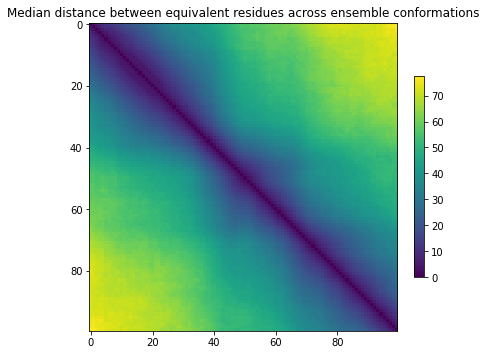

In [19]:
fig, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(med_distance)
fig.colorbar(im, fraction=0.03, pad=0.05)
plt.title("Median distance between equivalent residues across ensemble conformations")
plt.show()

#### Standard deviation of the distance of each pair of equivalent positions across ensemble conformations

In [35]:
stdev_distance = np.zeros((N,N))
for i in range(N): #for 
    for j in range(N):#for every conformation
        distances = []
        for k in range(M):
            distances.append(distance_matrices[k][i,j])
        stdev_distance[i,j] = np.std(distances)

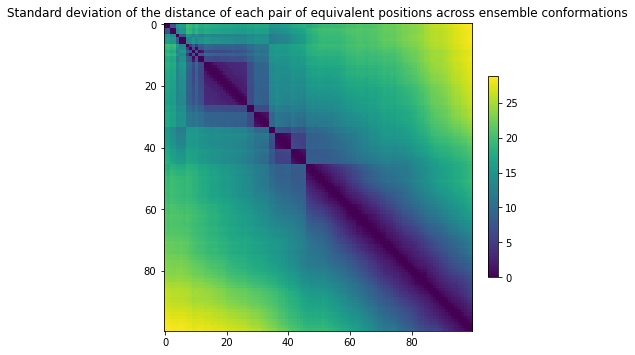

In [36]:
fig, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(stdev_distance)
fig.colorbar(im, fraction=0.03, pad=0.05)
plt.title("Standard deviation of the distance of each pair of equivalent positions across ensemble conformations")
plt.show()

In [37]:
np.save(feature_folder + "stdev_distance.npy", stdev_distance)

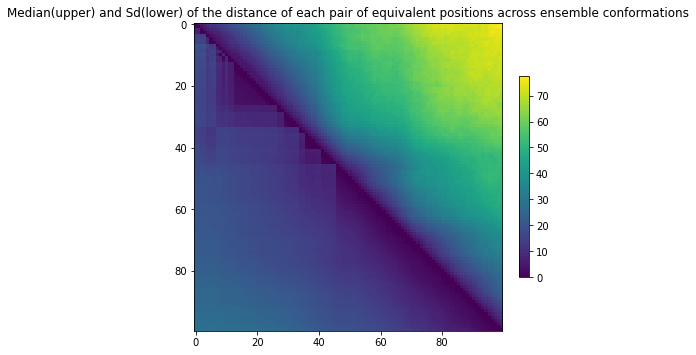

In [38]:
#upper matrix med_matrix, lower matrix sd_matrix
med_stdev_matrix= np.zeros((N,N))

for i in range(N):
    for j in range(N):
        if j> i:
            med_stdev_matrix[i,j]=med_distance[i,j]
        elif j<i:
            med_stdev_matrix[i,j]=stdev_distance[i,j]
        else:
            med_stdev_matrix[i,j]=0    
            
            
fig, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(med_stdev_matrix)
fig.colorbar(im, fraction=0.03, pad=0.05)
plt.title("Median(upper) and Sd(lower) of the distance of each pair of equivalent positions across ensemble conformations")
plt.show()
            
                



#### Median RMSD for each position across ensemble conformations 1.

In [8]:
# Superimpose all models to the first model, fragment-by-fragment (sliding window)
super_imposer = Superimposer()
structure_rmsd_fragments = []  # RMSD, no_models X no_fragments X fragment_size
window_size = 5
ref_model = [atom for atom in ensemble[0].get_atoms() if atom.get_name() == "CA"]  # CA of the first model

In [9]:
# Iterate all models
for i, model in enumerate(ensemble):
    if i > 0:
        model_rmsd = []  # RMSD, no_fragment X fragment_size
        alt_model = [atom for atom in model.get_atoms() if atom.get_name() == "CA"]  # coords of the model

        # Iterate fragments
        for start in range(len(ref_model) - window_size):
            end = start + window_size
            ref_fragment = ref_model[start:end]
            alt_fragment = alt_model[start:end]

            # Calculate rotation/translation matrices
            super_imposer.set_atoms(ref_fragment, alt_fragment)
            # print(super_imposer.rms, super_imposer.rotran)

            # Rotate-translate coordinates
            alt_fragment_coord = np.array([atom.get_coord() for atom in alt_fragment])
            alt_fragment_coord = np.dot(super_imposer.rotran[0].T, alt_fragment_coord.T).T
            alt_fragment_coord = alt_fragment_coord + super_imposer.rotran[1]

            # Calculate RMSD
            # https://en.wikipedia.org/wiki/Root-mean-square_deviation_of_atomic_positions
            ref_fragment_coord = np.array([atom.get_coord() for atom in ref_fragment])
            dist = ref_fragment_coord - alt_fragment_coord
            # rmsd_fragment = np.sqrt(np.sum(dist * dist) / window_size)  # Total RMSD of the fragment. Identical to super_imposer.rms
            rmsd_res = np.sqrt(np.sum(dist * dist, axis=1))  # RMSD for each residue of the fragment

            model_rmsd.append(rmsd_res)

        structure_rmsd_fragments.append(model_rmsd)
        
        
        
        



# skip the next cell and use the npy file

In [30]:

# Measuring local backbone flexibilirt ans conformational biasese within ensembles


_RMSD_along_all_conf=[] # list of RMSD_n values acrossall possibile pairs of conformation
for i, model_i in enumerate(ensemble):
    for j, model_j in enumerate(ensemble):
        if j>i:
            model_rmsd = []  # RMSD, no_fragment X fragment_size
            ref_model = [atom for atom in model_i.get_atoms() if atom.get_name() == "CA"]  # CA of the first model
            alt_model = [atom for atom in model_j.get_atoms() if atom.get_name() == "CA"]  # coords of the model
            
            # Iterate fragments
            for start in range(len(ref_model) - window_size):
                end = start + window_size
                ref_fragment = ref_model[start:end]
                alt_fragment = alt_model[start:end]

                # Calculate rotation/translation matrices
                super_imposer.set_atoms(ref_fragment, alt_fragment)
                # print(super_imposer.rms, super_imposer.rotran)

                # Rotate-translate coordinates
                alt_fragment_coord = np.array([atom.get_coord() for atom in alt_fragment])
                alt_fragment_coord = np.dot(super_imposer.rotran[0].T, alt_fragment_coord.T).T
                alt_fragment_coord = alt_fragment_coord + super_imposer.rotran[1]

                # Calculate RMSD
                # https://en.wikipedia.org/wiki/Root-mean-square_deviation_of_atomic_positions
                ref_fragment_coord = np.array([atom.get_coord() for atom in ref_fragment])
                dist = ref_fragment_coord - alt_fragment_coord
                rmsd_fragment = np.sqrt(np.sum(dist * dist) / window_size)  # Total RMSD of the fragment. Identical to super_imposer.rms
                #rmsd_res = np.sqrt(np.sum(dist * dist, axis=1))  # RMSD for each residue of the fragment
                model_rmsd.append(rmsd_fragment)
           # print ("modeli-{}, modelj-{},".format(model_i,model_j))
            _RMSD_along_all_conf.append(model_rmsd)
            
            


modeli-<Model id=0>, modelj-<Model id=1>,
modeli-<Model id=0>, modelj-<Model id=2>,
modeli-<Model id=0>, modelj-<Model id=3>,
modeli-<Model id=0>, modelj-<Model id=4>,
modeli-<Model id=0>, modelj-<Model id=5>,
modeli-<Model id=0>, modelj-<Model id=6>,
modeli-<Model id=0>, modelj-<Model id=7>,
modeli-<Model id=0>, modelj-<Model id=8>,
modeli-<Model id=0>, modelj-<Model id=9>,
modeli-<Model id=0>, modelj-<Model id=10>,
modeli-<Model id=0>, modelj-<Model id=11>,
modeli-<Model id=0>, modelj-<Model id=12>,
modeli-<Model id=0>, modelj-<Model id=13>,
modeli-<Model id=0>, modelj-<Model id=14>,
modeli-<Model id=0>, modelj-<Model id=15>,
modeli-<Model id=0>, modelj-<Model id=16>,
modeli-<Model id=0>, modelj-<Model id=17>,
modeli-<Model id=0>, modelj-<Model id=18>,
modeli-<Model id=0>, modelj-<Model id=19>,
modeli-<Model id=0>, modelj-<Model id=20>,
modeli-<Model id=0>, modelj-<Model id=21>,
modeli-<Model id=0>, modelj-<Model id=22>,
modeli-<Model id=0>, modelj-<Model id=23>,
modeli-<Model id=0>,

modeli-<Model id=0>, modelj-<Model id=195>,
modeli-<Model id=0>, modelj-<Model id=196>,
modeli-<Model id=0>, modelj-<Model id=197>,
modeli-<Model id=0>, modelj-<Model id=198>,
modeli-<Model id=0>, modelj-<Model id=199>,
modeli-<Model id=1>, modelj-<Model id=2>,
modeli-<Model id=1>, modelj-<Model id=3>,
modeli-<Model id=1>, modelj-<Model id=4>,
modeli-<Model id=1>, modelj-<Model id=5>,
modeli-<Model id=1>, modelj-<Model id=6>,
modeli-<Model id=1>, modelj-<Model id=7>,
modeli-<Model id=1>, modelj-<Model id=8>,
modeli-<Model id=1>, modelj-<Model id=9>,
modeli-<Model id=1>, modelj-<Model id=10>,
modeli-<Model id=1>, modelj-<Model id=11>,
modeli-<Model id=1>, modelj-<Model id=12>,
modeli-<Model id=1>, modelj-<Model id=13>,
modeli-<Model id=1>, modelj-<Model id=14>,
modeli-<Model id=1>, modelj-<Model id=15>,
modeli-<Model id=1>, modelj-<Model id=16>,
modeli-<Model id=1>, modelj-<Model id=17>,
modeli-<Model id=1>, modelj-<Model id=18>,
modeli-<Model id=1>, modelj-<Model id=19>,
modeli-<Model 

modeli-<Model id=1>, modelj-<Model id=194>,
modeli-<Model id=1>, modelj-<Model id=195>,
modeli-<Model id=1>, modelj-<Model id=196>,
modeli-<Model id=1>, modelj-<Model id=197>,
modeli-<Model id=1>, modelj-<Model id=198>,
modeli-<Model id=1>, modelj-<Model id=199>,
modeli-<Model id=2>, modelj-<Model id=3>,
modeli-<Model id=2>, modelj-<Model id=4>,
modeli-<Model id=2>, modelj-<Model id=5>,
modeli-<Model id=2>, modelj-<Model id=6>,
modeli-<Model id=2>, modelj-<Model id=7>,
modeli-<Model id=2>, modelj-<Model id=8>,
modeli-<Model id=2>, modelj-<Model id=9>,
modeli-<Model id=2>, modelj-<Model id=10>,
modeli-<Model id=2>, modelj-<Model id=11>,
modeli-<Model id=2>, modelj-<Model id=12>,
modeli-<Model id=2>, modelj-<Model id=13>,
modeli-<Model id=2>, modelj-<Model id=14>,
modeli-<Model id=2>, modelj-<Model id=15>,
modeli-<Model id=2>, modelj-<Model id=16>,
modeli-<Model id=2>, modelj-<Model id=17>,
modeli-<Model id=2>, modelj-<Model id=18>,
modeli-<Model id=2>, modelj-<Model id=19>,
modeli-<Mode

modeli-<Model id=2>, modelj-<Model id=190>,
modeli-<Model id=2>, modelj-<Model id=191>,
modeli-<Model id=2>, modelj-<Model id=192>,
modeli-<Model id=2>, modelj-<Model id=193>,
modeli-<Model id=2>, modelj-<Model id=194>,
modeli-<Model id=2>, modelj-<Model id=195>,
modeli-<Model id=2>, modelj-<Model id=196>,
modeli-<Model id=2>, modelj-<Model id=197>,
modeli-<Model id=2>, modelj-<Model id=198>,
modeli-<Model id=2>, modelj-<Model id=199>,
modeli-<Model id=3>, modelj-<Model id=4>,
modeli-<Model id=3>, modelj-<Model id=5>,
modeli-<Model id=3>, modelj-<Model id=6>,
modeli-<Model id=3>, modelj-<Model id=7>,
modeli-<Model id=3>, modelj-<Model id=8>,
modeli-<Model id=3>, modelj-<Model id=9>,
modeli-<Model id=3>, modelj-<Model id=10>,
modeli-<Model id=3>, modelj-<Model id=11>,
modeli-<Model id=3>, modelj-<Model id=12>,
modeli-<Model id=3>, modelj-<Model id=13>,
modeli-<Model id=3>, modelj-<Model id=14>,
modeli-<Model id=3>, modelj-<Model id=15>,
modeli-<Model id=3>, modelj-<Model id=16>,
modeli-

modeli-<Model id=3>, modelj-<Model id=192>,
modeli-<Model id=3>, modelj-<Model id=193>,
modeli-<Model id=3>, modelj-<Model id=194>,
modeli-<Model id=3>, modelj-<Model id=195>,
modeli-<Model id=3>, modelj-<Model id=196>,
modeli-<Model id=3>, modelj-<Model id=197>,
modeli-<Model id=3>, modelj-<Model id=198>,
modeli-<Model id=3>, modelj-<Model id=199>,
modeli-<Model id=4>, modelj-<Model id=5>,
modeli-<Model id=4>, modelj-<Model id=6>,
modeli-<Model id=4>, modelj-<Model id=7>,
modeli-<Model id=4>, modelj-<Model id=8>,
modeli-<Model id=4>, modelj-<Model id=9>,
modeli-<Model id=4>, modelj-<Model id=10>,
modeli-<Model id=4>, modelj-<Model id=11>,
modeli-<Model id=4>, modelj-<Model id=12>,
modeli-<Model id=4>, modelj-<Model id=13>,
modeli-<Model id=4>, modelj-<Model id=14>,
modeli-<Model id=4>, modelj-<Model id=15>,
modeli-<Model id=4>, modelj-<Model id=16>,
modeli-<Model id=4>, modelj-<Model id=17>,
modeli-<Model id=4>, modelj-<Model id=18>,
modeli-<Model id=4>, modelj-<Model id=19>,
modeli-<

modeli-<Model id=4>, modelj-<Model id=186>,
modeli-<Model id=4>, modelj-<Model id=187>,
modeli-<Model id=4>, modelj-<Model id=188>,
modeli-<Model id=4>, modelj-<Model id=189>,
modeli-<Model id=4>, modelj-<Model id=190>,
modeli-<Model id=4>, modelj-<Model id=191>,
modeli-<Model id=4>, modelj-<Model id=192>,
modeli-<Model id=4>, modelj-<Model id=193>,
modeli-<Model id=4>, modelj-<Model id=194>,
modeli-<Model id=4>, modelj-<Model id=195>,
modeli-<Model id=4>, modelj-<Model id=196>,
modeli-<Model id=4>, modelj-<Model id=197>,
modeli-<Model id=4>, modelj-<Model id=198>,
modeli-<Model id=4>, modelj-<Model id=199>,
modeli-<Model id=5>, modelj-<Model id=6>,
modeli-<Model id=5>, modelj-<Model id=7>,
modeli-<Model id=5>, modelj-<Model id=8>,
modeli-<Model id=5>, modelj-<Model id=9>,
modeli-<Model id=5>, modelj-<Model id=10>,
modeli-<Model id=5>, modelj-<Model id=11>,
modeli-<Model id=5>, modelj-<Model id=12>,
modeli-<Model id=5>, modelj-<Model id=13>,
modeli-<Model id=5>, modelj-<Model id=14>,
m

modeli-<Model id=5>, modelj-<Model id=181>,
modeli-<Model id=5>, modelj-<Model id=182>,
modeli-<Model id=5>, modelj-<Model id=183>,
modeli-<Model id=5>, modelj-<Model id=184>,
modeli-<Model id=5>, modelj-<Model id=185>,
modeli-<Model id=5>, modelj-<Model id=186>,
modeli-<Model id=5>, modelj-<Model id=187>,
modeli-<Model id=5>, modelj-<Model id=188>,
modeli-<Model id=5>, modelj-<Model id=189>,
modeli-<Model id=5>, modelj-<Model id=190>,
modeli-<Model id=5>, modelj-<Model id=191>,
modeli-<Model id=5>, modelj-<Model id=192>,
modeli-<Model id=5>, modelj-<Model id=193>,
modeli-<Model id=5>, modelj-<Model id=194>,
modeli-<Model id=5>, modelj-<Model id=195>,
modeli-<Model id=5>, modelj-<Model id=196>,
modeli-<Model id=5>, modelj-<Model id=197>,
modeli-<Model id=5>, modelj-<Model id=198>,
modeli-<Model id=5>, modelj-<Model id=199>,
modeli-<Model id=6>, modelj-<Model id=7>,
modeli-<Model id=6>, modelj-<Model id=8>,
modeli-<Model id=6>, modelj-<Model id=9>,
modeli-<Model id=6>, modelj-<Model id=

modeli-<Model id=6>, modelj-<Model id=179>,
modeli-<Model id=6>, modelj-<Model id=180>,
modeli-<Model id=6>, modelj-<Model id=181>,
modeli-<Model id=6>, modelj-<Model id=182>,
modeli-<Model id=6>, modelj-<Model id=183>,
modeli-<Model id=6>, modelj-<Model id=184>,
modeli-<Model id=6>, modelj-<Model id=185>,
modeli-<Model id=6>, modelj-<Model id=186>,
modeli-<Model id=6>, modelj-<Model id=187>,
modeli-<Model id=6>, modelj-<Model id=188>,
modeli-<Model id=6>, modelj-<Model id=189>,
modeli-<Model id=6>, modelj-<Model id=190>,
modeli-<Model id=6>, modelj-<Model id=191>,
modeli-<Model id=6>, modelj-<Model id=192>,
modeli-<Model id=6>, modelj-<Model id=193>,
modeli-<Model id=6>, modelj-<Model id=194>,
modeli-<Model id=6>, modelj-<Model id=195>,
modeli-<Model id=6>, modelj-<Model id=196>,
modeli-<Model id=6>, modelj-<Model id=197>,
modeli-<Model id=6>, modelj-<Model id=198>,
modeli-<Model id=6>, modelj-<Model id=199>,
modeli-<Model id=7>, modelj-<Model id=8>,
modeli-<Model id=7>, modelj-<Model

modeli-<Model id=7>, modelj-<Model id=180>,
modeli-<Model id=7>, modelj-<Model id=181>,
modeli-<Model id=7>, modelj-<Model id=182>,
modeli-<Model id=7>, modelj-<Model id=183>,
modeli-<Model id=7>, modelj-<Model id=184>,
modeli-<Model id=7>, modelj-<Model id=185>,
modeli-<Model id=7>, modelj-<Model id=186>,
modeli-<Model id=7>, modelj-<Model id=187>,
modeli-<Model id=7>, modelj-<Model id=188>,
modeli-<Model id=7>, modelj-<Model id=189>,
modeli-<Model id=7>, modelj-<Model id=190>,
modeli-<Model id=7>, modelj-<Model id=191>,
modeli-<Model id=7>, modelj-<Model id=192>,
modeli-<Model id=7>, modelj-<Model id=193>,
modeli-<Model id=7>, modelj-<Model id=194>,
modeli-<Model id=7>, modelj-<Model id=195>,
modeli-<Model id=7>, modelj-<Model id=196>,
modeli-<Model id=7>, modelj-<Model id=197>,
modeli-<Model id=7>, modelj-<Model id=198>,
modeli-<Model id=7>, modelj-<Model id=199>,
modeli-<Model id=8>, modelj-<Model id=9>,
modeli-<Model id=8>, modelj-<Model id=10>,
modeli-<Model id=8>, modelj-<Model 

modeli-<Model id=8>, modelj-<Model id=186>,
modeli-<Model id=8>, modelj-<Model id=187>,
modeli-<Model id=8>, modelj-<Model id=188>,
modeli-<Model id=8>, modelj-<Model id=189>,
modeli-<Model id=8>, modelj-<Model id=190>,
modeli-<Model id=8>, modelj-<Model id=191>,
modeli-<Model id=8>, modelj-<Model id=192>,
modeli-<Model id=8>, modelj-<Model id=193>,
modeli-<Model id=8>, modelj-<Model id=194>,
modeli-<Model id=8>, modelj-<Model id=195>,
modeli-<Model id=8>, modelj-<Model id=196>,
modeli-<Model id=8>, modelj-<Model id=197>,
modeli-<Model id=8>, modelj-<Model id=198>,
modeli-<Model id=8>, modelj-<Model id=199>,
modeli-<Model id=9>, modelj-<Model id=10>,
modeli-<Model id=9>, modelj-<Model id=11>,
modeli-<Model id=9>, modelj-<Model id=12>,
modeli-<Model id=9>, modelj-<Model id=13>,
modeli-<Model id=9>, modelj-<Model id=14>,
modeli-<Model id=9>, modelj-<Model id=15>,
modeli-<Model id=9>, modelj-<Model id=16>,
modeli-<Model id=9>, modelj-<Model id=17>,
modeli-<Model id=9>, modelj-<Model id=18

modeli-<Model id=9>, modelj-<Model id=194>,
modeli-<Model id=9>, modelj-<Model id=195>,
modeli-<Model id=9>, modelj-<Model id=196>,
modeli-<Model id=9>, modelj-<Model id=197>,
modeli-<Model id=9>, modelj-<Model id=198>,
modeli-<Model id=9>, modelj-<Model id=199>,
modeli-<Model id=10>, modelj-<Model id=11>,
modeli-<Model id=10>, modelj-<Model id=12>,
modeli-<Model id=10>, modelj-<Model id=13>,
modeli-<Model id=10>, modelj-<Model id=14>,
modeli-<Model id=10>, modelj-<Model id=15>,
modeli-<Model id=10>, modelj-<Model id=16>,
modeli-<Model id=10>, modelj-<Model id=17>,
modeli-<Model id=10>, modelj-<Model id=18>,
modeli-<Model id=10>, modelj-<Model id=19>,
modeli-<Model id=10>, modelj-<Model id=20>,
modeli-<Model id=10>, modelj-<Model id=21>,
modeli-<Model id=10>, modelj-<Model id=22>,
modeli-<Model id=10>, modelj-<Model id=23>,
modeli-<Model id=10>, modelj-<Model id=24>,
modeli-<Model id=10>, modelj-<Model id=25>,
modeli-<Model id=10>, modelj-<Model id=26>,
modeli-<Model id=10>, modelj-<Mo

modeli-<Model id=10>, modelj-<Model id=196>,
modeli-<Model id=10>, modelj-<Model id=197>,
modeli-<Model id=10>, modelj-<Model id=198>,
modeli-<Model id=10>, modelj-<Model id=199>,
modeli-<Model id=11>, modelj-<Model id=12>,
modeli-<Model id=11>, modelj-<Model id=13>,
modeli-<Model id=11>, modelj-<Model id=14>,
modeli-<Model id=11>, modelj-<Model id=15>,
modeli-<Model id=11>, modelj-<Model id=16>,
modeli-<Model id=11>, modelj-<Model id=17>,
modeli-<Model id=11>, modelj-<Model id=18>,
modeli-<Model id=11>, modelj-<Model id=19>,
modeli-<Model id=11>, modelj-<Model id=20>,
modeli-<Model id=11>, modelj-<Model id=21>,
modeli-<Model id=11>, modelj-<Model id=22>,
modeli-<Model id=11>, modelj-<Model id=23>,
modeli-<Model id=11>, modelj-<Model id=24>,
modeli-<Model id=11>, modelj-<Model id=25>,
modeli-<Model id=11>, modelj-<Model id=26>,
modeli-<Model id=11>, modelj-<Model id=27>,
modeli-<Model id=11>, modelj-<Model id=28>,
modeli-<Model id=11>, modelj-<Model id=29>,
modeli-<Model id=11>, modelj

modeli-<Model id=11>, modelj-<Model id=199>,
modeli-<Model id=12>, modelj-<Model id=13>,
modeli-<Model id=12>, modelj-<Model id=14>,
modeli-<Model id=12>, modelj-<Model id=15>,
modeli-<Model id=12>, modelj-<Model id=16>,
modeli-<Model id=12>, modelj-<Model id=17>,
modeli-<Model id=12>, modelj-<Model id=18>,
modeli-<Model id=12>, modelj-<Model id=19>,
modeli-<Model id=12>, modelj-<Model id=20>,
modeli-<Model id=12>, modelj-<Model id=21>,
modeli-<Model id=12>, modelj-<Model id=22>,
modeli-<Model id=12>, modelj-<Model id=23>,
modeli-<Model id=12>, modelj-<Model id=24>,
modeli-<Model id=12>, modelj-<Model id=25>,
modeli-<Model id=12>, modelj-<Model id=26>,
modeli-<Model id=12>, modelj-<Model id=27>,
modeli-<Model id=12>, modelj-<Model id=28>,
modeli-<Model id=12>, modelj-<Model id=29>,
modeli-<Model id=12>, modelj-<Model id=30>,
modeli-<Model id=12>, modelj-<Model id=31>,
modeli-<Model id=12>, modelj-<Model id=32>,
modeli-<Model id=12>, modelj-<Model id=33>,
modeli-<Model id=12>, modelj-<M

modeli-<Model id=13>, modelj-<Model id=18>,
modeli-<Model id=13>, modelj-<Model id=19>,
modeli-<Model id=13>, modelj-<Model id=20>,
modeli-<Model id=13>, modelj-<Model id=21>,
modeli-<Model id=13>, modelj-<Model id=22>,
modeli-<Model id=13>, modelj-<Model id=23>,
modeli-<Model id=13>, modelj-<Model id=24>,
modeli-<Model id=13>, modelj-<Model id=25>,
modeli-<Model id=13>, modelj-<Model id=26>,
modeli-<Model id=13>, modelj-<Model id=27>,
modeli-<Model id=13>, modelj-<Model id=28>,
modeli-<Model id=13>, modelj-<Model id=29>,
modeli-<Model id=13>, modelj-<Model id=30>,
modeli-<Model id=13>, modelj-<Model id=31>,
modeli-<Model id=13>, modelj-<Model id=32>,
modeli-<Model id=13>, modelj-<Model id=33>,
modeli-<Model id=13>, modelj-<Model id=34>,
modeli-<Model id=13>, modelj-<Model id=35>,
modeli-<Model id=13>, modelj-<Model id=36>,
modeli-<Model id=13>, modelj-<Model id=37>,
modeli-<Model id=13>, modelj-<Model id=38>,
modeli-<Model id=13>, modelj-<Model id=39>,
modeli-<Model id=13>, modelj-<Mo

modeli-<Model id=14>, modelj-<Model id=25>,
modeli-<Model id=14>, modelj-<Model id=26>,
modeli-<Model id=14>, modelj-<Model id=27>,
modeli-<Model id=14>, modelj-<Model id=28>,
modeli-<Model id=14>, modelj-<Model id=29>,
modeli-<Model id=14>, modelj-<Model id=30>,
modeli-<Model id=14>, modelj-<Model id=31>,
modeli-<Model id=14>, modelj-<Model id=32>,
modeli-<Model id=14>, modelj-<Model id=33>,
modeli-<Model id=14>, modelj-<Model id=34>,
modeli-<Model id=14>, modelj-<Model id=35>,
modeli-<Model id=14>, modelj-<Model id=36>,
modeli-<Model id=14>, modelj-<Model id=37>,
modeli-<Model id=14>, modelj-<Model id=38>,
modeli-<Model id=14>, modelj-<Model id=39>,
modeli-<Model id=14>, modelj-<Model id=40>,
modeli-<Model id=14>, modelj-<Model id=41>,
modeli-<Model id=14>, modelj-<Model id=42>,
modeli-<Model id=14>, modelj-<Model id=43>,
modeli-<Model id=14>, modelj-<Model id=44>,
modeli-<Model id=14>, modelj-<Model id=45>,
modeli-<Model id=14>, modelj-<Model id=46>,
modeli-<Model id=14>, modelj-<Mo

modeli-<Model id=15>, modelj-<Model id=25>,
modeli-<Model id=15>, modelj-<Model id=26>,
modeli-<Model id=15>, modelj-<Model id=27>,
modeli-<Model id=15>, modelj-<Model id=28>,
modeli-<Model id=15>, modelj-<Model id=29>,
modeli-<Model id=15>, modelj-<Model id=30>,
modeli-<Model id=15>, modelj-<Model id=31>,
modeli-<Model id=15>, modelj-<Model id=32>,
modeli-<Model id=15>, modelj-<Model id=33>,
modeli-<Model id=15>, modelj-<Model id=34>,
modeli-<Model id=15>, modelj-<Model id=35>,
modeli-<Model id=15>, modelj-<Model id=36>,
modeli-<Model id=15>, modelj-<Model id=37>,
modeli-<Model id=15>, modelj-<Model id=38>,
modeli-<Model id=15>, modelj-<Model id=39>,
modeli-<Model id=15>, modelj-<Model id=40>,
modeli-<Model id=15>, modelj-<Model id=41>,
modeli-<Model id=15>, modelj-<Model id=42>,
modeli-<Model id=15>, modelj-<Model id=43>,
modeli-<Model id=15>, modelj-<Model id=44>,
modeli-<Model id=15>, modelj-<Model id=45>,
modeli-<Model id=15>, modelj-<Model id=46>,
modeli-<Model id=15>, modelj-<Mo

modeli-<Model id=16>, modelj-<Model id=28>,
modeli-<Model id=16>, modelj-<Model id=29>,
modeli-<Model id=16>, modelj-<Model id=30>,
modeli-<Model id=16>, modelj-<Model id=31>,
modeli-<Model id=16>, modelj-<Model id=32>,
modeli-<Model id=16>, modelj-<Model id=33>,
modeli-<Model id=16>, modelj-<Model id=34>,
modeli-<Model id=16>, modelj-<Model id=35>,
modeli-<Model id=16>, modelj-<Model id=36>,
modeli-<Model id=16>, modelj-<Model id=37>,
modeli-<Model id=16>, modelj-<Model id=38>,
modeli-<Model id=16>, modelj-<Model id=39>,
modeli-<Model id=16>, modelj-<Model id=40>,
modeli-<Model id=16>, modelj-<Model id=41>,
modeli-<Model id=16>, modelj-<Model id=42>,
modeli-<Model id=16>, modelj-<Model id=43>,
modeli-<Model id=16>, modelj-<Model id=44>,
modeli-<Model id=16>, modelj-<Model id=45>,
modeli-<Model id=16>, modelj-<Model id=46>,
modeli-<Model id=16>, modelj-<Model id=47>,
modeli-<Model id=16>, modelj-<Model id=48>,
modeli-<Model id=16>, modelj-<Model id=49>,
modeli-<Model id=16>, modelj-<Mo

modeli-<Model id=17>, modelj-<Model id=41>,
modeli-<Model id=17>, modelj-<Model id=42>,
modeli-<Model id=17>, modelj-<Model id=43>,
modeli-<Model id=17>, modelj-<Model id=44>,
modeli-<Model id=17>, modelj-<Model id=45>,
modeli-<Model id=17>, modelj-<Model id=46>,
modeli-<Model id=17>, modelj-<Model id=47>,
modeli-<Model id=17>, modelj-<Model id=48>,
modeli-<Model id=17>, modelj-<Model id=49>,
modeli-<Model id=17>, modelj-<Model id=50>,
modeli-<Model id=17>, modelj-<Model id=51>,
modeli-<Model id=17>, modelj-<Model id=52>,
modeli-<Model id=17>, modelj-<Model id=53>,
modeli-<Model id=17>, modelj-<Model id=54>,
modeli-<Model id=17>, modelj-<Model id=55>,
modeli-<Model id=17>, modelj-<Model id=56>,
modeli-<Model id=17>, modelj-<Model id=57>,
modeli-<Model id=17>, modelj-<Model id=58>,
modeli-<Model id=17>, modelj-<Model id=59>,
modeli-<Model id=17>, modelj-<Model id=60>,
modeli-<Model id=17>, modelj-<Model id=61>,
modeli-<Model id=17>, modelj-<Model id=62>,
modeli-<Model id=17>, modelj-<Mo

modeli-<Model id=18>, modelj-<Model id=48>,
modeli-<Model id=18>, modelj-<Model id=49>,
modeli-<Model id=18>, modelj-<Model id=50>,
modeli-<Model id=18>, modelj-<Model id=51>,
modeli-<Model id=18>, modelj-<Model id=52>,
modeli-<Model id=18>, modelj-<Model id=53>,
modeli-<Model id=18>, modelj-<Model id=54>,
modeli-<Model id=18>, modelj-<Model id=55>,
modeli-<Model id=18>, modelj-<Model id=56>,
modeli-<Model id=18>, modelj-<Model id=57>,
modeli-<Model id=18>, modelj-<Model id=58>,
modeli-<Model id=18>, modelj-<Model id=59>,
modeli-<Model id=18>, modelj-<Model id=60>,
modeli-<Model id=18>, modelj-<Model id=61>,
modeli-<Model id=18>, modelj-<Model id=62>,
modeli-<Model id=18>, modelj-<Model id=63>,
modeli-<Model id=18>, modelj-<Model id=64>,
modeli-<Model id=18>, modelj-<Model id=65>,
modeli-<Model id=18>, modelj-<Model id=66>,
modeli-<Model id=18>, modelj-<Model id=67>,
modeli-<Model id=18>, modelj-<Model id=68>,
modeli-<Model id=18>, modelj-<Model id=69>,
modeli-<Model id=18>, modelj-<Mo

modeli-<Model id=19>, modelj-<Model id=59>,
modeli-<Model id=19>, modelj-<Model id=60>,
modeli-<Model id=19>, modelj-<Model id=61>,
modeli-<Model id=19>, modelj-<Model id=62>,
modeli-<Model id=19>, modelj-<Model id=63>,
modeli-<Model id=19>, modelj-<Model id=64>,
modeli-<Model id=19>, modelj-<Model id=65>,
modeli-<Model id=19>, modelj-<Model id=66>,
modeli-<Model id=19>, modelj-<Model id=67>,
modeli-<Model id=19>, modelj-<Model id=68>,
modeli-<Model id=19>, modelj-<Model id=69>,
modeli-<Model id=19>, modelj-<Model id=70>,
modeli-<Model id=19>, modelj-<Model id=71>,
modeli-<Model id=19>, modelj-<Model id=72>,
modeli-<Model id=19>, modelj-<Model id=73>,
modeli-<Model id=19>, modelj-<Model id=74>,
modeli-<Model id=19>, modelj-<Model id=75>,
modeli-<Model id=19>, modelj-<Model id=76>,
modeli-<Model id=19>, modelj-<Model id=77>,
modeli-<Model id=19>, modelj-<Model id=78>,
modeli-<Model id=19>, modelj-<Model id=79>,
modeli-<Model id=19>, modelj-<Model id=80>,
modeli-<Model id=19>, modelj-<Mo

modeli-<Model id=20>, modelj-<Model id=70>,
modeli-<Model id=20>, modelj-<Model id=71>,
modeli-<Model id=20>, modelj-<Model id=72>,
modeli-<Model id=20>, modelj-<Model id=73>,
modeli-<Model id=20>, modelj-<Model id=74>,
modeli-<Model id=20>, modelj-<Model id=75>,
modeli-<Model id=20>, modelj-<Model id=76>,
modeli-<Model id=20>, modelj-<Model id=77>,
modeli-<Model id=20>, modelj-<Model id=78>,
modeli-<Model id=20>, modelj-<Model id=79>,
modeli-<Model id=20>, modelj-<Model id=80>,
modeli-<Model id=20>, modelj-<Model id=81>,
modeli-<Model id=20>, modelj-<Model id=82>,
modeli-<Model id=20>, modelj-<Model id=83>,
modeli-<Model id=20>, modelj-<Model id=84>,
modeli-<Model id=20>, modelj-<Model id=85>,
modeli-<Model id=20>, modelj-<Model id=86>,
modeli-<Model id=20>, modelj-<Model id=87>,
modeli-<Model id=20>, modelj-<Model id=88>,
modeli-<Model id=20>, modelj-<Model id=89>,
modeli-<Model id=20>, modelj-<Model id=90>,
modeli-<Model id=20>, modelj-<Model id=91>,
modeli-<Model id=20>, modelj-<Mo

modeli-<Model id=21>, modelj-<Model id=79>,
modeli-<Model id=21>, modelj-<Model id=80>,
modeli-<Model id=21>, modelj-<Model id=81>,
modeli-<Model id=21>, modelj-<Model id=82>,
modeli-<Model id=21>, modelj-<Model id=83>,
modeli-<Model id=21>, modelj-<Model id=84>,
modeli-<Model id=21>, modelj-<Model id=85>,
modeli-<Model id=21>, modelj-<Model id=86>,
modeli-<Model id=21>, modelj-<Model id=87>,
modeli-<Model id=21>, modelj-<Model id=88>,
modeli-<Model id=21>, modelj-<Model id=89>,
modeli-<Model id=21>, modelj-<Model id=90>,
modeli-<Model id=21>, modelj-<Model id=91>,
modeli-<Model id=21>, modelj-<Model id=92>,
modeli-<Model id=21>, modelj-<Model id=93>,
modeli-<Model id=21>, modelj-<Model id=94>,
modeli-<Model id=21>, modelj-<Model id=95>,
modeli-<Model id=21>, modelj-<Model id=96>,
modeli-<Model id=21>, modelj-<Model id=97>,
modeli-<Model id=21>, modelj-<Model id=98>,
modeli-<Model id=21>, modelj-<Model id=99>,
modeli-<Model id=21>, modelj-<Model id=100>,
modeli-<Model id=21>, modelj-<M

modeli-<Model id=22>, modelj-<Model id=88>,
modeli-<Model id=22>, modelj-<Model id=89>,
modeli-<Model id=22>, modelj-<Model id=90>,
modeli-<Model id=22>, modelj-<Model id=91>,
modeli-<Model id=22>, modelj-<Model id=92>,
modeli-<Model id=22>, modelj-<Model id=93>,
modeli-<Model id=22>, modelj-<Model id=94>,
modeli-<Model id=22>, modelj-<Model id=95>,
modeli-<Model id=22>, modelj-<Model id=96>,
modeli-<Model id=22>, modelj-<Model id=97>,
modeli-<Model id=22>, modelj-<Model id=98>,
modeli-<Model id=22>, modelj-<Model id=99>,
modeli-<Model id=22>, modelj-<Model id=100>,
modeli-<Model id=22>, modelj-<Model id=101>,
modeli-<Model id=22>, modelj-<Model id=102>,
modeli-<Model id=22>, modelj-<Model id=103>,
modeli-<Model id=22>, modelj-<Model id=104>,
modeli-<Model id=22>, modelj-<Model id=105>,
modeli-<Model id=22>, modelj-<Model id=106>,
modeli-<Model id=22>, modelj-<Model id=107>,
modeli-<Model id=22>, modelj-<Model id=108>,
modeli-<Model id=22>, modelj-<Model id=109>,
modeli-<Model id=22>, 

modeli-<Model id=23>, modelj-<Model id=108>,
modeli-<Model id=23>, modelj-<Model id=109>,
modeli-<Model id=23>, modelj-<Model id=110>,
modeli-<Model id=23>, modelj-<Model id=111>,
modeli-<Model id=23>, modelj-<Model id=112>,
modeli-<Model id=23>, modelj-<Model id=113>,
modeli-<Model id=23>, modelj-<Model id=114>,
modeli-<Model id=23>, modelj-<Model id=115>,
modeli-<Model id=23>, modelj-<Model id=116>,
modeli-<Model id=23>, modelj-<Model id=117>,
modeli-<Model id=23>, modelj-<Model id=118>,
modeli-<Model id=23>, modelj-<Model id=119>,
modeli-<Model id=23>, modelj-<Model id=120>,
modeli-<Model id=23>, modelj-<Model id=121>,
modeli-<Model id=23>, modelj-<Model id=122>,
modeli-<Model id=23>, modelj-<Model id=123>,
modeli-<Model id=23>, modelj-<Model id=124>,
modeli-<Model id=23>, modelj-<Model id=125>,
modeli-<Model id=23>, modelj-<Model id=126>,
modeli-<Model id=23>, modelj-<Model id=127>,
modeli-<Model id=23>, modelj-<Model id=128>,
modeli-<Model id=23>, modelj-<Model id=129>,
modeli-<Mo

modeli-<Model id=24>, modelj-<Model id=123>,
modeli-<Model id=24>, modelj-<Model id=124>,
modeli-<Model id=24>, modelj-<Model id=125>,
modeli-<Model id=24>, modelj-<Model id=126>,
modeli-<Model id=24>, modelj-<Model id=127>,
modeli-<Model id=24>, modelj-<Model id=128>,
modeli-<Model id=24>, modelj-<Model id=129>,
modeli-<Model id=24>, modelj-<Model id=130>,
modeli-<Model id=24>, modelj-<Model id=131>,
modeli-<Model id=24>, modelj-<Model id=132>,
modeli-<Model id=24>, modelj-<Model id=133>,
modeli-<Model id=24>, modelj-<Model id=134>,
modeli-<Model id=24>, modelj-<Model id=135>,
modeli-<Model id=24>, modelj-<Model id=136>,
modeli-<Model id=24>, modelj-<Model id=137>,
modeli-<Model id=24>, modelj-<Model id=138>,
modeli-<Model id=24>, modelj-<Model id=139>,
modeli-<Model id=24>, modelj-<Model id=140>,
modeli-<Model id=24>, modelj-<Model id=141>,
modeli-<Model id=24>, modelj-<Model id=142>,
modeli-<Model id=24>, modelj-<Model id=143>,
modeli-<Model id=24>, modelj-<Model id=144>,
modeli-<Mo

modeli-<Model id=25>, modelj-<Model id=140>,
modeli-<Model id=25>, modelj-<Model id=141>,
modeli-<Model id=25>, modelj-<Model id=142>,
modeli-<Model id=25>, modelj-<Model id=143>,
modeli-<Model id=25>, modelj-<Model id=144>,
modeli-<Model id=25>, modelj-<Model id=145>,
modeli-<Model id=25>, modelj-<Model id=146>,
modeli-<Model id=25>, modelj-<Model id=147>,
modeli-<Model id=25>, modelj-<Model id=148>,
modeli-<Model id=25>, modelj-<Model id=149>,
modeli-<Model id=25>, modelj-<Model id=150>,
modeli-<Model id=25>, modelj-<Model id=151>,
modeli-<Model id=25>, modelj-<Model id=152>,
modeli-<Model id=25>, modelj-<Model id=153>,
modeli-<Model id=25>, modelj-<Model id=154>,
modeli-<Model id=25>, modelj-<Model id=155>,
modeli-<Model id=25>, modelj-<Model id=156>,
modeli-<Model id=25>, modelj-<Model id=157>,
modeli-<Model id=25>, modelj-<Model id=158>,
modeli-<Model id=25>, modelj-<Model id=159>,
modeli-<Model id=25>, modelj-<Model id=160>,
modeli-<Model id=25>, modelj-<Model id=161>,
modeli-<Mo

modeli-<Model id=26>, modelj-<Model id=154>,
modeli-<Model id=26>, modelj-<Model id=155>,
modeli-<Model id=26>, modelj-<Model id=156>,
modeli-<Model id=26>, modelj-<Model id=157>,
modeli-<Model id=26>, modelj-<Model id=158>,
modeli-<Model id=26>, modelj-<Model id=159>,
modeli-<Model id=26>, modelj-<Model id=160>,
modeli-<Model id=26>, modelj-<Model id=161>,
modeli-<Model id=26>, modelj-<Model id=162>,
modeli-<Model id=26>, modelj-<Model id=163>,
modeli-<Model id=26>, modelj-<Model id=164>,
modeli-<Model id=26>, modelj-<Model id=165>,
modeli-<Model id=26>, modelj-<Model id=166>,
modeli-<Model id=26>, modelj-<Model id=167>,
modeli-<Model id=26>, modelj-<Model id=168>,
modeli-<Model id=26>, modelj-<Model id=169>,
modeli-<Model id=26>, modelj-<Model id=170>,
modeli-<Model id=26>, modelj-<Model id=171>,
modeli-<Model id=26>, modelj-<Model id=172>,
modeli-<Model id=26>, modelj-<Model id=173>,
modeli-<Model id=26>, modelj-<Model id=174>,
modeli-<Model id=26>, modelj-<Model id=175>,
modeli-<Mo

modeli-<Model id=27>, modelj-<Model id=173>,
modeli-<Model id=27>, modelj-<Model id=174>,
modeli-<Model id=27>, modelj-<Model id=175>,
modeli-<Model id=27>, modelj-<Model id=176>,
modeli-<Model id=27>, modelj-<Model id=177>,
modeli-<Model id=27>, modelj-<Model id=178>,
modeli-<Model id=27>, modelj-<Model id=179>,
modeli-<Model id=27>, modelj-<Model id=180>,
modeli-<Model id=27>, modelj-<Model id=181>,
modeli-<Model id=27>, modelj-<Model id=182>,
modeli-<Model id=27>, modelj-<Model id=183>,
modeli-<Model id=27>, modelj-<Model id=184>,
modeli-<Model id=27>, modelj-<Model id=185>,
modeli-<Model id=27>, modelj-<Model id=186>,
modeli-<Model id=27>, modelj-<Model id=187>,
modeli-<Model id=27>, modelj-<Model id=188>,
modeli-<Model id=27>, modelj-<Model id=189>,
modeli-<Model id=27>, modelj-<Model id=190>,
modeli-<Model id=27>, modelj-<Model id=191>,
modeli-<Model id=27>, modelj-<Model id=192>,
modeli-<Model id=27>, modelj-<Model id=193>,
modeli-<Model id=27>, modelj-<Model id=194>,
modeli-<Mo

modeli-<Model id=28>, modelj-<Model id=190>,
modeli-<Model id=28>, modelj-<Model id=191>,
modeli-<Model id=28>, modelj-<Model id=192>,
modeli-<Model id=28>, modelj-<Model id=193>,
modeli-<Model id=28>, modelj-<Model id=194>,
modeli-<Model id=28>, modelj-<Model id=195>,
modeli-<Model id=28>, modelj-<Model id=196>,
modeli-<Model id=28>, modelj-<Model id=197>,
modeli-<Model id=28>, modelj-<Model id=198>,
modeli-<Model id=28>, modelj-<Model id=199>,
modeli-<Model id=29>, modelj-<Model id=30>,
modeli-<Model id=29>, modelj-<Model id=31>,
modeli-<Model id=29>, modelj-<Model id=32>,
modeli-<Model id=29>, modelj-<Model id=33>,
modeli-<Model id=29>, modelj-<Model id=34>,
modeli-<Model id=29>, modelj-<Model id=35>,
modeli-<Model id=29>, modelj-<Model id=36>,
modeli-<Model id=29>, modelj-<Model id=37>,
modeli-<Model id=29>, modelj-<Model id=38>,
modeli-<Model id=29>, modelj-<Model id=39>,
modeli-<Model id=29>, modelj-<Model id=40>,
modeli-<Model id=29>, modelj-<Model id=41>,
modeli-<Model id=29>, 

modeli-<Model id=30>, modelj-<Model id=42>,
modeli-<Model id=30>, modelj-<Model id=43>,
modeli-<Model id=30>, modelj-<Model id=44>,
modeli-<Model id=30>, modelj-<Model id=45>,
modeli-<Model id=30>, modelj-<Model id=46>,
modeli-<Model id=30>, modelj-<Model id=47>,
modeli-<Model id=30>, modelj-<Model id=48>,
modeli-<Model id=30>, modelj-<Model id=49>,
modeli-<Model id=30>, modelj-<Model id=50>,
modeli-<Model id=30>, modelj-<Model id=51>,
modeli-<Model id=30>, modelj-<Model id=52>,
modeli-<Model id=30>, modelj-<Model id=53>,
modeli-<Model id=30>, modelj-<Model id=54>,
modeli-<Model id=30>, modelj-<Model id=55>,
modeli-<Model id=30>, modelj-<Model id=56>,
modeli-<Model id=30>, modelj-<Model id=57>,
modeli-<Model id=30>, modelj-<Model id=58>,
modeli-<Model id=30>, modelj-<Model id=59>,
modeli-<Model id=30>, modelj-<Model id=60>,
modeli-<Model id=30>, modelj-<Model id=61>,
modeli-<Model id=30>, modelj-<Model id=62>,
modeli-<Model id=30>, modelj-<Model id=63>,
modeli-<Model id=30>, modelj-<Mo

modeli-<Model id=31>, modelj-<Model id=59>,
modeli-<Model id=31>, modelj-<Model id=60>,
modeli-<Model id=31>, modelj-<Model id=61>,
modeli-<Model id=31>, modelj-<Model id=62>,
modeli-<Model id=31>, modelj-<Model id=63>,
modeli-<Model id=31>, modelj-<Model id=64>,
modeli-<Model id=31>, modelj-<Model id=65>,
modeli-<Model id=31>, modelj-<Model id=66>,
modeli-<Model id=31>, modelj-<Model id=67>,
modeli-<Model id=31>, modelj-<Model id=68>,
modeli-<Model id=31>, modelj-<Model id=69>,
modeli-<Model id=31>, modelj-<Model id=70>,
modeli-<Model id=31>, modelj-<Model id=71>,
modeli-<Model id=31>, modelj-<Model id=72>,
modeli-<Model id=31>, modelj-<Model id=73>,
modeli-<Model id=31>, modelj-<Model id=74>,
modeli-<Model id=31>, modelj-<Model id=75>,
modeli-<Model id=31>, modelj-<Model id=76>,
modeli-<Model id=31>, modelj-<Model id=77>,
modeli-<Model id=31>, modelj-<Model id=78>,
modeli-<Model id=31>, modelj-<Model id=79>,
modeli-<Model id=31>, modelj-<Model id=80>,
modeli-<Model id=31>, modelj-<Mo

modeli-<Model id=32>, modelj-<Model id=78>,
modeli-<Model id=32>, modelj-<Model id=79>,
modeli-<Model id=32>, modelj-<Model id=80>,
modeli-<Model id=32>, modelj-<Model id=81>,
modeli-<Model id=32>, modelj-<Model id=82>,
modeli-<Model id=32>, modelj-<Model id=83>,
modeli-<Model id=32>, modelj-<Model id=84>,
modeli-<Model id=32>, modelj-<Model id=85>,
modeli-<Model id=32>, modelj-<Model id=86>,
modeli-<Model id=32>, modelj-<Model id=87>,
modeli-<Model id=32>, modelj-<Model id=88>,
modeli-<Model id=32>, modelj-<Model id=89>,
modeli-<Model id=32>, modelj-<Model id=90>,
modeli-<Model id=32>, modelj-<Model id=91>,
modeli-<Model id=32>, modelj-<Model id=92>,
modeli-<Model id=32>, modelj-<Model id=93>,
modeli-<Model id=32>, modelj-<Model id=94>,
modeli-<Model id=32>, modelj-<Model id=95>,
modeli-<Model id=32>, modelj-<Model id=96>,
modeli-<Model id=32>, modelj-<Model id=97>,
modeli-<Model id=32>, modelj-<Model id=98>,
modeli-<Model id=32>, modelj-<Model id=99>,
modeli-<Model id=32>, modelj-<Mo

modeli-<Model id=33>, modelj-<Model id=99>,
modeli-<Model id=33>, modelj-<Model id=100>,
modeli-<Model id=33>, modelj-<Model id=101>,
modeli-<Model id=33>, modelj-<Model id=102>,
modeli-<Model id=33>, modelj-<Model id=103>,
modeli-<Model id=33>, modelj-<Model id=104>,
modeli-<Model id=33>, modelj-<Model id=105>,
modeli-<Model id=33>, modelj-<Model id=106>,
modeli-<Model id=33>, modelj-<Model id=107>,
modeli-<Model id=33>, modelj-<Model id=108>,
modeli-<Model id=33>, modelj-<Model id=109>,
modeli-<Model id=33>, modelj-<Model id=110>,
modeli-<Model id=33>, modelj-<Model id=111>,
modeli-<Model id=33>, modelj-<Model id=112>,
modeli-<Model id=33>, modelj-<Model id=113>,
modeli-<Model id=33>, modelj-<Model id=114>,
modeli-<Model id=33>, modelj-<Model id=115>,
modeli-<Model id=33>, modelj-<Model id=116>,
modeli-<Model id=33>, modelj-<Model id=117>,
modeli-<Model id=33>, modelj-<Model id=118>,
modeli-<Model id=33>, modelj-<Model id=119>,
modeli-<Model id=33>, modelj-<Model id=120>,
modeli-<Mod

modeli-<Model id=34>, modelj-<Model id=126>,
modeli-<Model id=34>, modelj-<Model id=127>,
modeli-<Model id=34>, modelj-<Model id=128>,
modeli-<Model id=34>, modelj-<Model id=129>,
modeli-<Model id=34>, modelj-<Model id=130>,
modeli-<Model id=34>, modelj-<Model id=131>,
modeli-<Model id=34>, modelj-<Model id=132>,
modeli-<Model id=34>, modelj-<Model id=133>,
modeli-<Model id=34>, modelj-<Model id=134>,
modeli-<Model id=34>, modelj-<Model id=135>,
modeli-<Model id=34>, modelj-<Model id=136>,
modeli-<Model id=34>, modelj-<Model id=137>,
modeli-<Model id=34>, modelj-<Model id=138>,
modeli-<Model id=34>, modelj-<Model id=139>,
modeli-<Model id=34>, modelj-<Model id=140>,
modeli-<Model id=34>, modelj-<Model id=141>,
modeli-<Model id=34>, modelj-<Model id=142>,
modeli-<Model id=34>, modelj-<Model id=143>,
modeli-<Model id=34>, modelj-<Model id=144>,
modeli-<Model id=34>, modelj-<Model id=145>,
modeli-<Model id=34>, modelj-<Model id=146>,
modeli-<Model id=34>, modelj-<Model id=147>,
modeli-<Mo

modeli-<Model id=35>, modelj-<Model id=152>,
modeli-<Model id=35>, modelj-<Model id=153>,
modeli-<Model id=35>, modelj-<Model id=154>,
modeli-<Model id=35>, modelj-<Model id=155>,
modeli-<Model id=35>, modelj-<Model id=156>,
modeli-<Model id=35>, modelj-<Model id=157>,
modeli-<Model id=35>, modelj-<Model id=158>,
modeli-<Model id=35>, modelj-<Model id=159>,
modeli-<Model id=35>, modelj-<Model id=160>,
modeli-<Model id=35>, modelj-<Model id=161>,
modeli-<Model id=35>, modelj-<Model id=162>,
modeli-<Model id=35>, modelj-<Model id=163>,
modeli-<Model id=35>, modelj-<Model id=164>,
modeli-<Model id=35>, modelj-<Model id=165>,
modeli-<Model id=35>, modelj-<Model id=166>,
modeli-<Model id=35>, modelj-<Model id=167>,
modeli-<Model id=35>, modelj-<Model id=168>,
modeli-<Model id=35>, modelj-<Model id=169>,
modeli-<Model id=35>, modelj-<Model id=170>,
modeli-<Model id=35>, modelj-<Model id=171>,
modeli-<Model id=35>, modelj-<Model id=172>,
modeli-<Model id=35>, modelj-<Model id=173>,
modeli-<Mo

modeli-<Model id=36>, modelj-<Model id=179>,
modeli-<Model id=36>, modelj-<Model id=180>,
modeli-<Model id=36>, modelj-<Model id=181>,
modeli-<Model id=36>, modelj-<Model id=182>,
modeli-<Model id=36>, modelj-<Model id=183>,
modeli-<Model id=36>, modelj-<Model id=184>,
modeli-<Model id=36>, modelj-<Model id=185>,
modeli-<Model id=36>, modelj-<Model id=186>,
modeli-<Model id=36>, modelj-<Model id=187>,
modeli-<Model id=36>, modelj-<Model id=188>,
modeli-<Model id=36>, modelj-<Model id=189>,
modeli-<Model id=36>, modelj-<Model id=190>,
modeli-<Model id=36>, modelj-<Model id=191>,
modeli-<Model id=36>, modelj-<Model id=192>,
modeli-<Model id=36>, modelj-<Model id=193>,
modeli-<Model id=36>, modelj-<Model id=194>,
modeli-<Model id=36>, modelj-<Model id=195>,
modeli-<Model id=36>, modelj-<Model id=196>,
modeli-<Model id=36>, modelj-<Model id=197>,
modeli-<Model id=36>, modelj-<Model id=198>,
modeli-<Model id=36>, modelj-<Model id=199>,
modeli-<Model id=37>, modelj-<Model id=38>,
modeli-<Mod

modeli-<Model id=38>, modelj-<Model id=47>,
modeli-<Model id=38>, modelj-<Model id=48>,
modeli-<Model id=38>, modelj-<Model id=49>,
modeli-<Model id=38>, modelj-<Model id=50>,
modeli-<Model id=38>, modelj-<Model id=51>,
modeli-<Model id=38>, modelj-<Model id=52>,
modeli-<Model id=38>, modelj-<Model id=53>,
modeli-<Model id=38>, modelj-<Model id=54>,
modeli-<Model id=38>, modelj-<Model id=55>,
modeli-<Model id=38>, modelj-<Model id=56>,
modeli-<Model id=38>, modelj-<Model id=57>,
modeli-<Model id=38>, modelj-<Model id=58>,
modeli-<Model id=38>, modelj-<Model id=59>,
modeli-<Model id=38>, modelj-<Model id=60>,
modeli-<Model id=38>, modelj-<Model id=61>,
modeli-<Model id=38>, modelj-<Model id=62>,
modeli-<Model id=38>, modelj-<Model id=63>,
modeli-<Model id=38>, modelj-<Model id=64>,
modeli-<Model id=38>, modelj-<Model id=65>,
modeli-<Model id=38>, modelj-<Model id=66>,
modeli-<Model id=38>, modelj-<Model id=67>,
modeli-<Model id=38>, modelj-<Model id=68>,
modeli-<Model id=38>, modelj-<Mo

modeli-<Model id=39>, modelj-<Model id=82>,
modeli-<Model id=39>, modelj-<Model id=83>,
modeli-<Model id=39>, modelj-<Model id=84>,
modeli-<Model id=39>, modelj-<Model id=85>,
modeli-<Model id=39>, modelj-<Model id=86>,
modeli-<Model id=39>, modelj-<Model id=87>,
modeli-<Model id=39>, modelj-<Model id=88>,
modeli-<Model id=39>, modelj-<Model id=89>,
modeli-<Model id=39>, modelj-<Model id=90>,
modeli-<Model id=39>, modelj-<Model id=91>,
modeli-<Model id=39>, modelj-<Model id=92>,
modeli-<Model id=39>, modelj-<Model id=93>,
modeli-<Model id=39>, modelj-<Model id=94>,
modeli-<Model id=39>, modelj-<Model id=95>,
modeli-<Model id=39>, modelj-<Model id=96>,
modeli-<Model id=39>, modelj-<Model id=97>,
modeli-<Model id=39>, modelj-<Model id=98>,
modeli-<Model id=39>, modelj-<Model id=99>,
modeli-<Model id=39>, modelj-<Model id=100>,
modeli-<Model id=39>, modelj-<Model id=101>,
modeli-<Model id=39>, modelj-<Model id=102>,
modeli-<Model id=39>, modelj-<Model id=103>,
modeli-<Model id=39>, modelj

modeli-<Model id=40>, modelj-<Model id=117>,
modeli-<Model id=40>, modelj-<Model id=118>,
modeli-<Model id=40>, modelj-<Model id=119>,
modeli-<Model id=40>, modelj-<Model id=120>,
modeli-<Model id=40>, modelj-<Model id=121>,
modeli-<Model id=40>, modelj-<Model id=122>,
modeli-<Model id=40>, modelj-<Model id=123>,
modeli-<Model id=40>, modelj-<Model id=124>,
modeli-<Model id=40>, modelj-<Model id=125>,
modeli-<Model id=40>, modelj-<Model id=126>,
modeli-<Model id=40>, modelj-<Model id=127>,
modeli-<Model id=40>, modelj-<Model id=128>,
modeli-<Model id=40>, modelj-<Model id=129>,
modeli-<Model id=40>, modelj-<Model id=130>,
modeli-<Model id=40>, modelj-<Model id=131>,
modeli-<Model id=40>, modelj-<Model id=132>,
modeli-<Model id=40>, modelj-<Model id=133>,
modeli-<Model id=40>, modelj-<Model id=134>,
modeli-<Model id=40>, modelj-<Model id=135>,
modeli-<Model id=40>, modelj-<Model id=136>,
modeli-<Model id=40>, modelj-<Model id=137>,
modeli-<Model id=40>, modelj-<Model id=138>,
modeli-<Mo

modeli-<Model id=41>, modelj-<Model id=144>,
modeli-<Model id=41>, modelj-<Model id=145>,
modeli-<Model id=41>, modelj-<Model id=146>,
modeli-<Model id=41>, modelj-<Model id=147>,
modeli-<Model id=41>, modelj-<Model id=148>,
modeli-<Model id=41>, modelj-<Model id=149>,
modeli-<Model id=41>, modelj-<Model id=150>,
modeli-<Model id=41>, modelj-<Model id=151>,
modeli-<Model id=41>, modelj-<Model id=152>,
modeli-<Model id=41>, modelj-<Model id=153>,
modeli-<Model id=41>, modelj-<Model id=154>,
modeli-<Model id=41>, modelj-<Model id=155>,
modeli-<Model id=41>, modelj-<Model id=156>,
modeli-<Model id=41>, modelj-<Model id=157>,
modeli-<Model id=41>, modelj-<Model id=158>,
modeli-<Model id=41>, modelj-<Model id=159>,
modeli-<Model id=41>, modelj-<Model id=160>,
modeli-<Model id=41>, modelj-<Model id=161>,
modeli-<Model id=41>, modelj-<Model id=162>,
modeli-<Model id=41>, modelj-<Model id=163>,
modeli-<Model id=41>, modelj-<Model id=164>,
modeli-<Model id=41>, modelj-<Model id=165>,
modeli-<Mo

modeli-<Model id=42>, modelj-<Model id=182>,
modeli-<Model id=42>, modelj-<Model id=183>,
modeli-<Model id=42>, modelj-<Model id=184>,
modeli-<Model id=42>, modelj-<Model id=185>,
modeli-<Model id=42>, modelj-<Model id=186>,
modeli-<Model id=42>, modelj-<Model id=187>,
modeli-<Model id=42>, modelj-<Model id=188>,
modeli-<Model id=42>, modelj-<Model id=189>,
modeli-<Model id=42>, modelj-<Model id=190>,
modeli-<Model id=42>, modelj-<Model id=191>,
modeli-<Model id=42>, modelj-<Model id=192>,
modeli-<Model id=42>, modelj-<Model id=193>,
modeli-<Model id=42>, modelj-<Model id=194>,
modeli-<Model id=42>, modelj-<Model id=195>,
modeli-<Model id=42>, modelj-<Model id=196>,
modeli-<Model id=42>, modelj-<Model id=197>,
modeli-<Model id=42>, modelj-<Model id=198>,
modeli-<Model id=42>, modelj-<Model id=199>,
modeli-<Model id=43>, modelj-<Model id=44>,
modeli-<Model id=43>, modelj-<Model id=45>,
modeli-<Model id=43>, modelj-<Model id=46>,
modeli-<Model id=43>, modelj-<Model id=47>,
modeli-<Model 

modeli-<Model id=44>, modelj-<Model id=59>,
modeli-<Model id=44>, modelj-<Model id=60>,
modeli-<Model id=44>, modelj-<Model id=61>,
modeli-<Model id=44>, modelj-<Model id=62>,
modeli-<Model id=44>, modelj-<Model id=63>,
modeli-<Model id=44>, modelj-<Model id=64>,
modeli-<Model id=44>, modelj-<Model id=65>,
modeli-<Model id=44>, modelj-<Model id=66>,
modeli-<Model id=44>, modelj-<Model id=67>,
modeli-<Model id=44>, modelj-<Model id=68>,
modeli-<Model id=44>, modelj-<Model id=69>,
modeli-<Model id=44>, modelj-<Model id=70>,
modeli-<Model id=44>, modelj-<Model id=71>,
modeli-<Model id=44>, modelj-<Model id=72>,
modeli-<Model id=44>, modelj-<Model id=73>,
modeli-<Model id=44>, modelj-<Model id=74>,
modeli-<Model id=44>, modelj-<Model id=75>,
modeli-<Model id=44>, modelj-<Model id=76>,
modeli-<Model id=44>, modelj-<Model id=77>,
modeli-<Model id=44>, modelj-<Model id=78>,
modeli-<Model id=44>, modelj-<Model id=79>,
modeli-<Model id=44>, modelj-<Model id=80>,
modeli-<Model id=44>, modelj-<Mo

modeli-<Model id=45>, modelj-<Model id=93>,
modeli-<Model id=45>, modelj-<Model id=94>,
modeli-<Model id=45>, modelj-<Model id=95>,
modeli-<Model id=45>, modelj-<Model id=96>,
modeli-<Model id=45>, modelj-<Model id=97>,
modeli-<Model id=45>, modelj-<Model id=98>,
modeli-<Model id=45>, modelj-<Model id=99>,
modeli-<Model id=45>, modelj-<Model id=100>,
modeli-<Model id=45>, modelj-<Model id=101>,
modeli-<Model id=45>, modelj-<Model id=102>,
modeli-<Model id=45>, modelj-<Model id=103>,
modeli-<Model id=45>, modelj-<Model id=104>,
modeli-<Model id=45>, modelj-<Model id=105>,
modeli-<Model id=45>, modelj-<Model id=106>,
modeli-<Model id=45>, modelj-<Model id=107>,
modeli-<Model id=45>, modelj-<Model id=108>,
modeli-<Model id=45>, modelj-<Model id=109>,
modeli-<Model id=45>, modelj-<Model id=110>,
modeli-<Model id=45>, modelj-<Model id=111>,
modeli-<Model id=45>, modelj-<Model id=112>,
modeli-<Model id=45>, modelj-<Model id=113>,
modeli-<Model id=45>, modelj-<Model id=114>,
modeli-<Model id=

modeli-<Model id=46>, modelj-<Model id=125>,
modeli-<Model id=46>, modelj-<Model id=126>,
modeli-<Model id=46>, modelj-<Model id=127>,
modeli-<Model id=46>, modelj-<Model id=128>,
modeli-<Model id=46>, modelj-<Model id=129>,
modeli-<Model id=46>, modelj-<Model id=130>,
modeli-<Model id=46>, modelj-<Model id=131>,
modeli-<Model id=46>, modelj-<Model id=132>,
modeli-<Model id=46>, modelj-<Model id=133>,
modeli-<Model id=46>, modelj-<Model id=134>,
modeli-<Model id=46>, modelj-<Model id=135>,
modeli-<Model id=46>, modelj-<Model id=136>,
modeli-<Model id=46>, modelj-<Model id=137>,
modeli-<Model id=46>, modelj-<Model id=138>,
modeli-<Model id=46>, modelj-<Model id=139>,
modeli-<Model id=46>, modelj-<Model id=140>,
modeli-<Model id=46>, modelj-<Model id=141>,
modeli-<Model id=46>, modelj-<Model id=142>,
modeli-<Model id=46>, modelj-<Model id=143>,
modeli-<Model id=46>, modelj-<Model id=144>,
modeli-<Model id=46>, modelj-<Model id=145>,
modeli-<Model id=46>, modelj-<Model id=146>,
modeli-<Mo

modeli-<Model id=47>, modelj-<Model id=168>,
modeli-<Model id=47>, modelj-<Model id=169>,
modeli-<Model id=47>, modelj-<Model id=170>,
modeli-<Model id=47>, modelj-<Model id=171>,
modeli-<Model id=47>, modelj-<Model id=172>,
modeli-<Model id=47>, modelj-<Model id=173>,
modeli-<Model id=47>, modelj-<Model id=174>,
modeli-<Model id=47>, modelj-<Model id=175>,
modeli-<Model id=47>, modelj-<Model id=176>,
modeli-<Model id=47>, modelj-<Model id=177>,
modeli-<Model id=47>, modelj-<Model id=178>,
modeli-<Model id=47>, modelj-<Model id=179>,
modeli-<Model id=47>, modelj-<Model id=180>,
modeli-<Model id=47>, modelj-<Model id=181>,
modeli-<Model id=47>, modelj-<Model id=182>,
modeli-<Model id=47>, modelj-<Model id=183>,
modeli-<Model id=47>, modelj-<Model id=184>,
modeli-<Model id=47>, modelj-<Model id=185>,
modeli-<Model id=47>, modelj-<Model id=186>,
modeli-<Model id=47>, modelj-<Model id=187>,
modeli-<Model id=47>, modelj-<Model id=188>,
modeli-<Model id=47>, modelj-<Model id=189>,
modeli-<Mo

modeli-<Model id=49>, modelj-<Model id=54>,
modeli-<Model id=49>, modelj-<Model id=55>,
modeli-<Model id=49>, modelj-<Model id=56>,
modeli-<Model id=49>, modelj-<Model id=57>,
modeli-<Model id=49>, modelj-<Model id=58>,
modeli-<Model id=49>, modelj-<Model id=59>,
modeli-<Model id=49>, modelj-<Model id=60>,
modeli-<Model id=49>, modelj-<Model id=61>,
modeli-<Model id=49>, modelj-<Model id=62>,
modeli-<Model id=49>, modelj-<Model id=63>,
modeli-<Model id=49>, modelj-<Model id=64>,
modeli-<Model id=49>, modelj-<Model id=65>,
modeli-<Model id=49>, modelj-<Model id=66>,
modeli-<Model id=49>, modelj-<Model id=67>,
modeli-<Model id=49>, modelj-<Model id=68>,
modeli-<Model id=49>, modelj-<Model id=69>,
modeli-<Model id=49>, modelj-<Model id=70>,
modeli-<Model id=49>, modelj-<Model id=71>,
modeli-<Model id=49>, modelj-<Model id=72>,
modeli-<Model id=49>, modelj-<Model id=73>,
modeli-<Model id=49>, modelj-<Model id=74>,
modeli-<Model id=49>, modelj-<Model id=75>,
modeli-<Model id=49>, modelj-<Mo

modeli-<Model id=50>, modelj-<Model id=90>,
modeli-<Model id=50>, modelj-<Model id=91>,
modeli-<Model id=50>, modelj-<Model id=92>,
modeli-<Model id=50>, modelj-<Model id=93>,
modeli-<Model id=50>, modelj-<Model id=94>,
modeli-<Model id=50>, modelj-<Model id=95>,
modeli-<Model id=50>, modelj-<Model id=96>,
modeli-<Model id=50>, modelj-<Model id=97>,
modeli-<Model id=50>, modelj-<Model id=98>,
modeli-<Model id=50>, modelj-<Model id=99>,
modeli-<Model id=50>, modelj-<Model id=100>,
modeli-<Model id=50>, modelj-<Model id=101>,
modeli-<Model id=50>, modelj-<Model id=102>,
modeli-<Model id=50>, modelj-<Model id=103>,
modeli-<Model id=50>, modelj-<Model id=104>,
modeli-<Model id=50>, modelj-<Model id=105>,
modeli-<Model id=50>, modelj-<Model id=106>,
modeli-<Model id=50>, modelj-<Model id=107>,
modeli-<Model id=50>, modelj-<Model id=108>,
modeli-<Model id=50>, modelj-<Model id=109>,
modeli-<Model id=50>, modelj-<Model id=110>,
modeli-<Model id=50>, modelj-<Model id=111>,
modeli-<Model id=50>

modeli-<Model id=51>, modelj-<Model id=133>,
modeli-<Model id=51>, modelj-<Model id=134>,
modeli-<Model id=51>, modelj-<Model id=135>,
modeli-<Model id=51>, modelj-<Model id=136>,
modeli-<Model id=51>, modelj-<Model id=137>,
modeli-<Model id=51>, modelj-<Model id=138>,
modeli-<Model id=51>, modelj-<Model id=139>,
modeli-<Model id=51>, modelj-<Model id=140>,
modeli-<Model id=51>, modelj-<Model id=141>,
modeli-<Model id=51>, modelj-<Model id=142>,
modeli-<Model id=51>, modelj-<Model id=143>,
modeli-<Model id=51>, modelj-<Model id=144>,
modeli-<Model id=51>, modelj-<Model id=145>,
modeli-<Model id=51>, modelj-<Model id=146>,
modeli-<Model id=51>, modelj-<Model id=147>,
modeli-<Model id=51>, modelj-<Model id=148>,
modeli-<Model id=51>, modelj-<Model id=149>,
modeli-<Model id=51>, modelj-<Model id=150>,
modeli-<Model id=51>, modelj-<Model id=151>,
modeli-<Model id=51>, modelj-<Model id=152>,
modeli-<Model id=51>, modelj-<Model id=153>,
modeli-<Model id=51>, modelj-<Model id=154>,
modeli-<Mo

modeli-<Model id=52>, modelj-<Model id=181>,
modeli-<Model id=52>, modelj-<Model id=182>,
modeli-<Model id=52>, modelj-<Model id=183>,
modeli-<Model id=52>, modelj-<Model id=184>,
modeli-<Model id=52>, modelj-<Model id=185>,
modeli-<Model id=52>, modelj-<Model id=186>,
modeli-<Model id=52>, modelj-<Model id=187>,
modeli-<Model id=52>, modelj-<Model id=188>,
modeli-<Model id=52>, modelj-<Model id=189>,
modeli-<Model id=52>, modelj-<Model id=190>,
modeli-<Model id=52>, modelj-<Model id=191>,
modeli-<Model id=52>, modelj-<Model id=192>,
modeli-<Model id=52>, modelj-<Model id=193>,
modeli-<Model id=52>, modelj-<Model id=194>,
modeli-<Model id=52>, modelj-<Model id=195>,
modeli-<Model id=52>, modelj-<Model id=196>,
modeli-<Model id=52>, modelj-<Model id=197>,
modeli-<Model id=52>, modelj-<Model id=198>,
modeli-<Model id=52>, modelj-<Model id=199>,
modeli-<Model id=53>, modelj-<Model id=54>,
modeli-<Model id=53>, modelj-<Model id=55>,
modeli-<Model id=53>, modelj-<Model id=56>,
modeli-<Model

modeli-<Model id=54>, modelj-<Model id=75>,
modeli-<Model id=54>, modelj-<Model id=76>,
modeli-<Model id=54>, modelj-<Model id=77>,
modeli-<Model id=54>, modelj-<Model id=78>,
modeli-<Model id=54>, modelj-<Model id=79>,
modeli-<Model id=54>, modelj-<Model id=80>,
modeli-<Model id=54>, modelj-<Model id=81>,
modeli-<Model id=54>, modelj-<Model id=82>,
modeli-<Model id=54>, modelj-<Model id=83>,
modeli-<Model id=54>, modelj-<Model id=84>,
modeli-<Model id=54>, modelj-<Model id=85>,
modeli-<Model id=54>, modelj-<Model id=86>,
modeli-<Model id=54>, modelj-<Model id=87>,
modeli-<Model id=54>, modelj-<Model id=88>,
modeli-<Model id=54>, modelj-<Model id=89>,
modeli-<Model id=54>, modelj-<Model id=90>,
modeli-<Model id=54>, modelj-<Model id=91>,
modeli-<Model id=54>, modelj-<Model id=92>,
modeli-<Model id=54>, modelj-<Model id=93>,
modeli-<Model id=54>, modelj-<Model id=94>,
modeli-<Model id=54>, modelj-<Model id=95>,
modeli-<Model id=54>, modelj-<Model id=96>,
modeli-<Model id=54>, modelj-<Mo

modeli-<Model id=55>, modelj-<Model id=117>,
modeli-<Model id=55>, modelj-<Model id=118>,
modeli-<Model id=55>, modelj-<Model id=119>,
modeli-<Model id=55>, modelj-<Model id=120>,
modeli-<Model id=55>, modelj-<Model id=121>,
modeli-<Model id=55>, modelj-<Model id=122>,
modeli-<Model id=55>, modelj-<Model id=123>,
modeli-<Model id=55>, modelj-<Model id=124>,
modeli-<Model id=55>, modelj-<Model id=125>,
modeli-<Model id=55>, modelj-<Model id=126>,
modeli-<Model id=55>, modelj-<Model id=127>,
modeli-<Model id=55>, modelj-<Model id=128>,
modeli-<Model id=55>, modelj-<Model id=129>,
modeli-<Model id=55>, modelj-<Model id=130>,
modeli-<Model id=55>, modelj-<Model id=131>,
modeli-<Model id=55>, modelj-<Model id=132>,
modeli-<Model id=55>, modelj-<Model id=133>,
modeli-<Model id=55>, modelj-<Model id=134>,
modeli-<Model id=55>, modelj-<Model id=135>,
modeli-<Model id=55>, modelj-<Model id=136>,
modeli-<Model id=55>, modelj-<Model id=137>,
modeli-<Model id=55>, modelj-<Model id=138>,
modeli-<Mo

modeli-<Model id=56>, modelj-<Model id=164>,
modeli-<Model id=56>, modelj-<Model id=165>,
modeli-<Model id=56>, modelj-<Model id=166>,
modeli-<Model id=56>, modelj-<Model id=167>,
modeli-<Model id=56>, modelj-<Model id=168>,
modeli-<Model id=56>, modelj-<Model id=169>,
modeli-<Model id=56>, modelj-<Model id=170>,
modeli-<Model id=56>, modelj-<Model id=171>,
modeli-<Model id=56>, modelj-<Model id=172>,
modeli-<Model id=56>, modelj-<Model id=173>,
modeli-<Model id=56>, modelj-<Model id=174>,
modeli-<Model id=56>, modelj-<Model id=175>,
modeli-<Model id=56>, modelj-<Model id=176>,
modeli-<Model id=56>, modelj-<Model id=177>,
modeli-<Model id=56>, modelj-<Model id=178>,
modeli-<Model id=56>, modelj-<Model id=179>,
modeli-<Model id=56>, modelj-<Model id=180>,
modeli-<Model id=56>, modelj-<Model id=181>,
modeli-<Model id=56>, modelj-<Model id=182>,
modeli-<Model id=56>, modelj-<Model id=183>,
modeli-<Model id=56>, modelj-<Model id=184>,
modeli-<Model id=56>, modelj-<Model id=185>,
modeli-<Mo

modeli-<Model id=58>, modelj-<Model id=70>,
modeli-<Model id=58>, modelj-<Model id=71>,
modeli-<Model id=58>, modelj-<Model id=72>,
modeli-<Model id=58>, modelj-<Model id=73>,
modeli-<Model id=58>, modelj-<Model id=74>,
modeli-<Model id=58>, modelj-<Model id=75>,
modeli-<Model id=58>, modelj-<Model id=76>,
modeli-<Model id=58>, modelj-<Model id=77>,
modeli-<Model id=58>, modelj-<Model id=78>,
modeli-<Model id=58>, modelj-<Model id=79>,
modeli-<Model id=58>, modelj-<Model id=80>,
modeli-<Model id=58>, modelj-<Model id=81>,
modeli-<Model id=58>, modelj-<Model id=82>,
modeli-<Model id=58>, modelj-<Model id=83>,
modeli-<Model id=58>, modelj-<Model id=84>,
modeli-<Model id=58>, modelj-<Model id=85>,
modeli-<Model id=58>, modelj-<Model id=86>,
modeli-<Model id=58>, modelj-<Model id=87>,
modeli-<Model id=58>, modelj-<Model id=88>,
modeli-<Model id=58>, modelj-<Model id=89>,
modeli-<Model id=58>, modelj-<Model id=90>,
modeli-<Model id=58>, modelj-<Model id=91>,
modeli-<Model id=58>, modelj-<Mo

modeli-<Model id=59>, modelj-<Model id=122>,
modeli-<Model id=59>, modelj-<Model id=123>,
modeli-<Model id=59>, modelj-<Model id=124>,
modeli-<Model id=59>, modelj-<Model id=125>,
modeli-<Model id=59>, modelj-<Model id=126>,
modeli-<Model id=59>, modelj-<Model id=127>,
modeli-<Model id=59>, modelj-<Model id=128>,
modeli-<Model id=59>, modelj-<Model id=129>,
modeli-<Model id=59>, modelj-<Model id=130>,
modeli-<Model id=59>, modelj-<Model id=131>,
modeli-<Model id=59>, modelj-<Model id=132>,
modeli-<Model id=59>, modelj-<Model id=133>,
modeli-<Model id=59>, modelj-<Model id=134>,
modeli-<Model id=59>, modelj-<Model id=135>,
modeli-<Model id=59>, modelj-<Model id=136>,
modeli-<Model id=59>, modelj-<Model id=137>,
modeli-<Model id=59>, modelj-<Model id=138>,
modeli-<Model id=59>, modelj-<Model id=139>,
modeli-<Model id=59>, modelj-<Model id=140>,
modeli-<Model id=59>, modelj-<Model id=141>,
modeli-<Model id=59>, modelj-<Model id=142>,
modeli-<Model id=59>, modelj-<Model id=143>,
modeli-<Mo

modeli-<Model id=60>, modelj-<Model id=172>,
modeli-<Model id=60>, modelj-<Model id=173>,
modeli-<Model id=60>, modelj-<Model id=174>,
modeli-<Model id=60>, modelj-<Model id=175>,
modeli-<Model id=60>, modelj-<Model id=176>,
modeli-<Model id=60>, modelj-<Model id=177>,
modeli-<Model id=60>, modelj-<Model id=178>,
modeli-<Model id=60>, modelj-<Model id=179>,
modeli-<Model id=60>, modelj-<Model id=180>,
modeli-<Model id=60>, modelj-<Model id=181>,
modeli-<Model id=60>, modelj-<Model id=182>,
modeli-<Model id=60>, modelj-<Model id=183>,
modeli-<Model id=60>, modelj-<Model id=184>,
modeli-<Model id=60>, modelj-<Model id=185>,
modeli-<Model id=60>, modelj-<Model id=186>,
modeli-<Model id=60>, modelj-<Model id=187>,
modeli-<Model id=60>, modelj-<Model id=188>,
modeli-<Model id=60>, modelj-<Model id=189>,
modeli-<Model id=60>, modelj-<Model id=190>,
modeli-<Model id=60>, modelj-<Model id=191>,
modeli-<Model id=60>, modelj-<Model id=192>,
modeli-<Model id=60>, modelj-<Model id=193>,
modeli-<Mo

modeli-<Model id=62>, modelj-<Model id=88>,
modeli-<Model id=62>, modelj-<Model id=89>,
modeli-<Model id=62>, modelj-<Model id=90>,
modeli-<Model id=62>, modelj-<Model id=91>,
modeli-<Model id=62>, modelj-<Model id=92>,
modeli-<Model id=62>, modelj-<Model id=93>,
modeli-<Model id=62>, modelj-<Model id=94>,
modeli-<Model id=62>, modelj-<Model id=95>,
modeli-<Model id=62>, modelj-<Model id=96>,
modeli-<Model id=62>, modelj-<Model id=97>,
modeli-<Model id=62>, modelj-<Model id=98>,
modeli-<Model id=62>, modelj-<Model id=99>,
modeli-<Model id=62>, modelj-<Model id=100>,
modeli-<Model id=62>, modelj-<Model id=101>,
modeli-<Model id=62>, modelj-<Model id=102>,
modeli-<Model id=62>, modelj-<Model id=103>,
modeli-<Model id=62>, modelj-<Model id=104>,
modeli-<Model id=62>, modelj-<Model id=105>,
modeli-<Model id=62>, modelj-<Model id=106>,
modeli-<Model id=62>, modelj-<Model id=107>,
modeli-<Model id=62>, modelj-<Model id=108>,
modeli-<Model id=62>, modelj-<Model id=109>,
modeli-<Model id=62>, 

modeli-<Model id=63>, modelj-<Model id=143>,
modeli-<Model id=63>, modelj-<Model id=144>,
modeli-<Model id=63>, modelj-<Model id=145>,
modeli-<Model id=63>, modelj-<Model id=146>,
modeli-<Model id=63>, modelj-<Model id=147>,
modeli-<Model id=63>, modelj-<Model id=148>,
modeli-<Model id=63>, modelj-<Model id=149>,
modeli-<Model id=63>, modelj-<Model id=150>,
modeli-<Model id=63>, modelj-<Model id=151>,
modeli-<Model id=63>, modelj-<Model id=152>,
modeli-<Model id=63>, modelj-<Model id=153>,
modeli-<Model id=63>, modelj-<Model id=154>,
modeli-<Model id=63>, modelj-<Model id=155>,
modeli-<Model id=63>, modelj-<Model id=156>,
modeli-<Model id=63>, modelj-<Model id=157>,
modeli-<Model id=63>, modelj-<Model id=158>,
modeli-<Model id=63>, modelj-<Model id=159>,
modeli-<Model id=63>, modelj-<Model id=160>,
modeli-<Model id=63>, modelj-<Model id=161>,
modeli-<Model id=63>, modelj-<Model id=162>,
modeli-<Model id=63>, modelj-<Model id=163>,
modeli-<Model id=63>, modelj-<Model id=164>,
modeli-<Mo

modeli-<Model id=64>, modelj-<Model id=193>,
modeli-<Model id=64>, modelj-<Model id=194>,
modeli-<Model id=64>, modelj-<Model id=195>,
modeli-<Model id=64>, modelj-<Model id=196>,
modeli-<Model id=64>, modelj-<Model id=197>,
modeli-<Model id=64>, modelj-<Model id=198>,
modeli-<Model id=64>, modelj-<Model id=199>,
modeli-<Model id=65>, modelj-<Model id=66>,
modeli-<Model id=65>, modelj-<Model id=67>,
modeli-<Model id=65>, modelj-<Model id=68>,
modeli-<Model id=65>, modelj-<Model id=69>,
modeli-<Model id=65>, modelj-<Model id=70>,
modeli-<Model id=65>, modelj-<Model id=71>,
modeli-<Model id=65>, modelj-<Model id=72>,
modeli-<Model id=65>, modelj-<Model id=73>,
modeli-<Model id=65>, modelj-<Model id=74>,
modeli-<Model id=65>, modelj-<Model id=75>,
modeli-<Model id=65>, modelj-<Model id=76>,
modeli-<Model id=65>, modelj-<Model id=77>,
modeli-<Model id=65>, modelj-<Model id=78>,
modeli-<Model id=65>, modelj-<Model id=79>,
modeli-<Model id=65>, modelj-<Model id=80>,
modeli-<Model id=65>, mod

modeli-<Model id=66>, modelj-<Model id=117>,
modeli-<Model id=66>, modelj-<Model id=118>,
modeli-<Model id=66>, modelj-<Model id=119>,
modeli-<Model id=66>, modelj-<Model id=120>,
modeli-<Model id=66>, modelj-<Model id=121>,
modeli-<Model id=66>, modelj-<Model id=122>,
modeli-<Model id=66>, modelj-<Model id=123>,
modeli-<Model id=66>, modelj-<Model id=124>,
modeli-<Model id=66>, modelj-<Model id=125>,
modeli-<Model id=66>, modelj-<Model id=126>,
modeli-<Model id=66>, modelj-<Model id=127>,
modeli-<Model id=66>, modelj-<Model id=128>,
modeli-<Model id=66>, modelj-<Model id=129>,
modeli-<Model id=66>, modelj-<Model id=130>,
modeli-<Model id=66>, modelj-<Model id=131>,
modeli-<Model id=66>, modelj-<Model id=132>,
modeli-<Model id=66>, modelj-<Model id=133>,
modeli-<Model id=66>, modelj-<Model id=134>,
modeli-<Model id=66>, modelj-<Model id=135>,
modeli-<Model id=66>, modelj-<Model id=136>,
modeli-<Model id=66>, modelj-<Model id=137>,
modeli-<Model id=66>, modelj-<Model id=138>,
modeli-<Mo

modeli-<Model id=67>, modelj-<Model id=175>,
modeli-<Model id=67>, modelj-<Model id=176>,
modeli-<Model id=67>, modelj-<Model id=177>,
modeli-<Model id=67>, modelj-<Model id=178>,
modeli-<Model id=67>, modelj-<Model id=179>,
modeli-<Model id=67>, modelj-<Model id=180>,
modeli-<Model id=67>, modelj-<Model id=181>,
modeli-<Model id=67>, modelj-<Model id=182>,
modeli-<Model id=67>, modelj-<Model id=183>,
modeli-<Model id=67>, modelj-<Model id=184>,
modeli-<Model id=67>, modelj-<Model id=185>,
modeli-<Model id=67>, modelj-<Model id=186>,
modeli-<Model id=67>, modelj-<Model id=187>,
modeli-<Model id=67>, modelj-<Model id=188>,
modeli-<Model id=67>, modelj-<Model id=189>,
modeli-<Model id=67>, modelj-<Model id=190>,
modeli-<Model id=67>, modelj-<Model id=191>,
modeli-<Model id=67>, modelj-<Model id=192>,
modeli-<Model id=67>, modelj-<Model id=193>,
modeli-<Model id=67>, modelj-<Model id=194>,
modeli-<Model id=67>, modelj-<Model id=195>,
modeli-<Model id=67>, modelj-<Model id=196>,
modeli-<Mo

modeli-<Model id=69>, modelj-<Model id=106>,
modeli-<Model id=69>, modelj-<Model id=107>,
modeli-<Model id=69>, modelj-<Model id=108>,
modeli-<Model id=69>, modelj-<Model id=109>,
modeli-<Model id=69>, modelj-<Model id=110>,
modeli-<Model id=69>, modelj-<Model id=111>,
modeli-<Model id=69>, modelj-<Model id=112>,
modeli-<Model id=69>, modelj-<Model id=113>,
modeli-<Model id=69>, modelj-<Model id=114>,
modeli-<Model id=69>, modelj-<Model id=115>,
modeli-<Model id=69>, modelj-<Model id=116>,
modeli-<Model id=69>, modelj-<Model id=117>,
modeli-<Model id=69>, modelj-<Model id=118>,
modeli-<Model id=69>, modelj-<Model id=119>,
modeli-<Model id=69>, modelj-<Model id=120>,
modeli-<Model id=69>, modelj-<Model id=121>,
modeli-<Model id=69>, modelj-<Model id=122>,
modeli-<Model id=69>, modelj-<Model id=123>,
modeli-<Model id=69>, modelj-<Model id=124>,
modeli-<Model id=69>, modelj-<Model id=125>,
modeli-<Model id=69>, modelj-<Model id=126>,
modeli-<Model id=69>, modelj-<Model id=127>,
modeli-<Mo

modeli-<Model id=70>, modelj-<Model id=169>,
modeli-<Model id=70>, modelj-<Model id=170>,
modeli-<Model id=70>, modelj-<Model id=171>,
modeli-<Model id=70>, modelj-<Model id=172>,
modeli-<Model id=70>, modelj-<Model id=173>,
modeli-<Model id=70>, modelj-<Model id=174>,
modeli-<Model id=70>, modelj-<Model id=175>,
modeli-<Model id=70>, modelj-<Model id=176>,
modeli-<Model id=70>, modelj-<Model id=177>,
modeli-<Model id=70>, modelj-<Model id=178>,
modeli-<Model id=70>, modelj-<Model id=179>,
modeli-<Model id=70>, modelj-<Model id=180>,
modeli-<Model id=70>, modelj-<Model id=181>,
modeli-<Model id=70>, modelj-<Model id=182>,
modeli-<Model id=70>, modelj-<Model id=183>,
modeli-<Model id=70>, modelj-<Model id=184>,
modeli-<Model id=70>, modelj-<Model id=185>,
modeli-<Model id=70>, modelj-<Model id=186>,
modeli-<Model id=70>, modelj-<Model id=187>,
modeli-<Model id=70>, modelj-<Model id=188>,
modeli-<Model id=70>, modelj-<Model id=189>,
modeli-<Model id=70>, modelj-<Model id=190>,
modeli-<Mo

modeli-<Model id=72>, modelj-<Model id=104>,
modeli-<Model id=72>, modelj-<Model id=105>,
modeli-<Model id=72>, modelj-<Model id=106>,
modeli-<Model id=72>, modelj-<Model id=107>,
modeli-<Model id=72>, modelj-<Model id=108>,
modeli-<Model id=72>, modelj-<Model id=109>,
modeli-<Model id=72>, modelj-<Model id=110>,
modeli-<Model id=72>, modelj-<Model id=111>,
modeli-<Model id=72>, modelj-<Model id=112>,
modeli-<Model id=72>, modelj-<Model id=113>,
modeli-<Model id=72>, modelj-<Model id=114>,
modeli-<Model id=72>, modelj-<Model id=115>,
modeli-<Model id=72>, modelj-<Model id=116>,
modeli-<Model id=72>, modelj-<Model id=117>,
modeli-<Model id=72>, modelj-<Model id=118>,
modeli-<Model id=72>, modelj-<Model id=119>,
modeli-<Model id=72>, modelj-<Model id=120>,
modeli-<Model id=72>, modelj-<Model id=121>,
modeli-<Model id=72>, modelj-<Model id=122>,
modeli-<Model id=72>, modelj-<Model id=123>,
modeli-<Model id=72>, modelj-<Model id=124>,
modeli-<Model id=72>, modelj-<Model id=125>,
modeli-<Mo

modeli-<Model id=73>, modelj-<Model id=166>,
modeli-<Model id=73>, modelj-<Model id=167>,
modeli-<Model id=73>, modelj-<Model id=168>,
modeli-<Model id=73>, modelj-<Model id=169>,
modeli-<Model id=73>, modelj-<Model id=170>,
modeli-<Model id=73>, modelj-<Model id=171>,
modeli-<Model id=73>, modelj-<Model id=172>,
modeli-<Model id=73>, modelj-<Model id=173>,
modeli-<Model id=73>, modelj-<Model id=174>,
modeli-<Model id=73>, modelj-<Model id=175>,
modeli-<Model id=73>, modelj-<Model id=176>,
modeli-<Model id=73>, modelj-<Model id=177>,
modeli-<Model id=73>, modelj-<Model id=178>,
modeli-<Model id=73>, modelj-<Model id=179>,
modeli-<Model id=73>, modelj-<Model id=180>,
modeli-<Model id=73>, modelj-<Model id=181>,
modeli-<Model id=73>, modelj-<Model id=182>,
modeli-<Model id=73>, modelj-<Model id=183>,
modeli-<Model id=73>, modelj-<Model id=184>,
modeli-<Model id=73>, modelj-<Model id=185>,
modeli-<Model id=73>, modelj-<Model id=186>,
modeli-<Model id=73>, modelj-<Model id=187>,
modeli-<Mo

modeli-<Model id=75>, modelj-<Model id=106>,
modeli-<Model id=75>, modelj-<Model id=107>,
modeli-<Model id=75>, modelj-<Model id=108>,
modeli-<Model id=75>, modelj-<Model id=109>,
modeli-<Model id=75>, modelj-<Model id=110>,
modeli-<Model id=75>, modelj-<Model id=111>,
modeli-<Model id=75>, modelj-<Model id=112>,
modeli-<Model id=75>, modelj-<Model id=113>,
modeli-<Model id=75>, modelj-<Model id=114>,
modeli-<Model id=75>, modelj-<Model id=115>,
modeli-<Model id=75>, modelj-<Model id=116>,
modeli-<Model id=75>, modelj-<Model id=117>,
modeli-<Model id=75>, modelj-<Model id=118>,
modeli-<Model id=75>, modelj-<Model id=119>,
modeli-<Model id=75>, modelj-<Model id=120>,
modeli-<Model id=75>, modelj-<Model id=121>,
modeli-<Model id=75>, modelj-<Model id=122>,
modeli-<Model id=75>, modelj-<Model id=123>,
modeli-<Model id=75>, modelj-<Model id=124>,
modeli-<Model id=75>, modelj-<Model id=125>,
modeli-<Model id=75>, modelj-<Model id=126>,
modeli-<Model id=75>, modelj-<Model id=127>,
modeli-<Mo

modeli-<Model id=76>, modelj-<Model id=177>,
modeli-<Model id=76>, modelj-<Model id=178>,
modeli-<Model id=76>, modelj-<Model id=179>,
modeli-<Model id=76>, modelj-<Model id=180>,
modeli-<Model id=76>, modelj-<Model id=181>,
modeli-<Model id=76>, modelj-<Model id=182>,
modeli-<Model id=76>, modelj-<Model id=183>,
modeli-<Model id=76>, modelj-<Model id=184>,
modeli-<Model id=76>, modelj-<Model id=185>,
modeli-<Model id=76>, modelj-<Model id=186>,
modeli-<Model id=76>, modelj-<Model id=187>,
modeli-<Model id=76>, modelj-<Model id=188>,
modeli-<Model id=76>, modelj-<Model id=189>,
modeli-<Model id=76>, modelj-<Model id=190>,
modeli-<Model id=76>, modelj-<Model id=191>,
modeli-<Model id=76>, modelj-<Model id=192>,
modeli-<Model id=76>, modelj-<Model id=193>,
modeli-<Model id=76>, modelj-<Model id=194>,
modeli-<Model id=76>, modelj-<Model id=195>,
modeli-<Model id=76>, modelj-<Model id=196>,
modeli-<Model id=76>, modelj-<Model id=197>,
modeli-<Model id=76>, modelj-<Model id=198>,
modeli-<Mo

modeli-<Model id=78>, modelj-<Model id=128>,
modeli-<Model id=78>, modelj-<Model id=129>,
modeli-<Model id=78>, modelj-<Model id=130>,
modeli-<Model id=78>, modelj-<Model id=131>,
modeli-<Model id=78>, modelj-<Model id=132>,
modeli-<Model id=78>, modelj-<Model id=133>,
modeli-<Model id=78>, modelj-<Model id=134>,
modeli-<Model id=78>, modelj-<Model id=135>,
modeli-<Model id=78>, modelj-<Model id=136>,
modeli-<Model id=78>, modelj-<Model id=137>,
modeli-<Model id=78>, modelj-<Model id=138>,
modeli-<Model id=78>, modelj-<Model id=139>,
modeli-<Model id=78>, modelj-<Model id=140>,
modeli-<Model id=78>, modelj-<Model id=141>,
modeli-<Model id=78>, modelj-<Model id=142>,
modeli-<Model id=78>, modelj-<Model id=143>,
modeli-<Model id=78>, modelj-<Model id=144>,
modeli-<Model id=78>, modelj-<Model id=145>,
modeli-<Model id=78>, modelj-<Model id=146>,
modeli-<Model id=78>, modelj-<Model id=147>,
modeli-<Model id=78>, modelj-<Model id=148>,
modeli-<Model id=78>, modelj-<Model id=149>,
modeli-<Mo

modeli-<Model id=80>, modelj-<Model id=81>,
modeli-<Model id=80>, modelj-<Model id=82>,
modeli-<Model id=80>, modelj-<Model id=83>,
modeli-<Model id=80>, modelj-<Model id=84>,
modeli-<Model id=80>, modelj-<Model id=85>,
modeli-<Model id=80>, modelj-<Model id=86>,
modeli-<Model id=80>, modelj-<Model id=87>,
modeli-<Model id=80>, modelj-<Model id=88>,
modeli-<Model id=80>, modelj-<Model id=89>,
modeli-<Model id=80>, modelj-<Model id=90>,
modeli-<Model id=80>, modelj-<Model id=91>,
modeli-<Model id=80>, modelj-<Model id=92>,
modeli-<Model id=80>, modelj-<Model id=93>,
modeli-<Model id=80>, modelj-<Model id=94>,
modeli-<Model id=80>, modelj-<Model id=95>,
modeli-<Model id=80>, modelj-<Model id=96>,
modeli-<Model id=80>, modelj-<Model id=97>,
modeli-<Model id=80>, modelj-<Model id=98>,
modeli-<Model id=80>, modelj-<Model id=99>,
modeli-<Model id=80>, modelj-<Model id=100>,
modeli-<Model id=80>, modelj-<Model id=101>,
modeli-<Model id=80>, modelj-<Model id=102>,
modeli-<Model id=80>, modelj-

modeli-<Model id=81>, modelj-<Model id=149>,
modeli-<Model id=81>, modelj-<Model id=150>,
modeli-<Model id=81>, modelj-<Model id=151>,
modeli-<Model id=81>, modelj-<Model id=152>,
modeli-<Model id=81>, modelj-<Model id=153>,
modeli-<Model id=81>, modelj-<Model id=154>,
modeli-<Model id=81>, modelj-<Model id=155>,
modeli-<Model id=81>, modelj-<Model id=156>,
modeli-<Model id=81>, modelj-<Model id=157>,
modeli-<Model id=81>, modelj-<Model id=158>,
modeli-<Model id=81>, modelj-<Model id=159>,
modeli-<Model id=81>, modelj-<Model id=160>,
modeli-<Model id=81>, modelj-<Model id=161>,
modeli-<Model id=81>, modelj-<Model id=162>,
modeli-<Model id=81>, modelj-<Model id=163>,
modeli-<Model id=81>, modelj-<Model id=164>,
modeli-<Model id=81>, modelj-<Model id=165>,
modeli-<Model id=81>, modelj-<Model id=166>,
modeli-<Model id=81>, modelj-<Model id=167>,
modeli-<Model id=81>, modelj-<Model id=168>,
modeli-<Model id=81>, modelj-<Model id=169>,
modeli-<Model id=81>, modelj-<Model id=170>,
modeli-<Mo

modeli-<Model id=83>, modelj-<Model id=107>,
modeli-<Model id=83>, modelj-<Model id=108>,
modeli-<Model id=83>, modelj-<Model id=109>,
modeli-<Model id=83>, modelj-<Model id=110>,
modeli-<Model id=83>, modelj-<Model id=111>,
modeli-<Model id=83>, modelj-<Model id=112>,
modeli-<Model id=83>, modelj-<Model id=113>,
modeli-<Model id=83>, modelj-<Model id=114>,
modeli-<Model id=83>, modelj-<Model id=115>,
modeli-<Model id=83>, modelj-<Model id=116>,
modeli-<Model id=83>, modelj-<Model id=117>,
modeli-<Model id=83>, modelj-<Model id=118>,
modeli-<Model id=83>, modelj-<Model id=119>,
modeli-<Model id=83>, modelj-<Model id=120>,
modeli-<Model id=83>, modelj-<Model id=121>,
modeli-<Model id=83>, modelj-<Model id=122>,
modeli-<Model id=83>, modelj-<Model id=123>,
modeli-<Model id=83>, modelj-<Model id=124>,
modeli-<Model id=83>, modelj-<Model id=125>,
modeli-<Model id=83>, modelj-<Model id=126>,
modeli-<Model id=83>, modelj-<Model id=127>,
modeli-<Model id=83>, modelj-<Model id=128>,
modeli-<Mo

modeli-<Model id=84>, modelj-<Model id=184>,
modeli-<Model id=84>, modelj-<Model id=185>,
modeli-<Model id=84>, modelj-<Model id=186>,
modeli-<Model id=84>, modelj-<Model id=187>,
modeli-<Model id=84>, modelj-<Model id=188>,
modeli-<Model id=84>, modelj-<Model id=189>,
modeli-<Model id=84>, modelj-<Model id=190>,
modeli-<Model id=84>, modelj-<Model id=191>,
modeli-<Model id=84>, modelj-<Model id=192>,
modeli-<Model id=84>, modelj-<Model id=193>,
modeli-<Model id=84>, modelj-<Model id=194>,
modeli-<Model id=84>, modelj-<Model id=195>,
modeli-<Model id=84>, modelj-<Model id=196>,
modeli-<Model id=84>, modelj-<Model id=197>,
modeli-<Model id=84>, modelj-<Model id=198>,
modeli-<Model id=84>, modelj-<Model id=199>,
modeli-<Model id=85>, modelj-<Model id=86>,
modeli-<Model id=85>, modelj-<Model id=87>,
modeli-<Model id=85>, modelj-<Model id=88>,
modeli-<Model id=85>, modelj-<Model id=89>,
modeli-<Model id=85>, modelj-<Model id=90>,
modeli-<Model id=85>, modelj-<Model id=91>,
modeli-<Model id

modeli-<Model id=86>, modelj-<Model id=147>,
modeli-<Model id=86>, modelj-<Model id=148>,
modeli-<Model id=86>, modelj-<Model id=149>,
modeli-<Model id=86>, modelj-<Model id=150>,
modeli-<Model id=86>, modelj-<Model id=151>,
modeli-<Model id=86>, modelj-<Model id=152>,
modeli-<Model id=86>, modelj-<Model id=153>,
modeli-<Model id=86>, modelj-<Model id=154>,
modeli-<Model id=86>, modelj-<Model id=155>,
modeli-<Model id=86>, modelj-<Model id=156>,
modeli-<Model id=86>, modelj-<Model id=157>,
modeli-<Model id=86>, modelj-<Model id=158>,
modeli-<Model id=86>, modelj-<Model id=159>,
modeli-<Model id=86>, modelj-<Model id=160>,
modeli-<Model id=86>, modelj-<Model id=161>,
modeli-<Model id=86>, modelj-<Model id=162>,
modeli-<Model id=86>, modelj-<Model id=163>,
modeli-<Model id=86>, modelj-<Model id=164>,
modeli-<Model id=86>, modelj-<Model id=165>,
modeli-<Model id=86>, modelj-<Model id=166>,
modeli-<Model id=86>, modelj-<Model id=167>,
modeli-<Model id=86>, modelj-<Model id=168>,
modeli-<Mo

modeli-<Model id=88>, modelj-<Model id=115>,
modeli-<Model id=88>, modelj-<Model id=116>,
modeli-<Model id=88>, modelj-<Model id=117>,
modeli-<Model id=88>, modelj-<Model id=118>,
modeli-<Model id=88>, modelj-<Model id=119>,
modeli-<Model id=88>, modelj-<Model id=120>,
modeli-<Model id=88>, modelj-<Model id=121>,
modeli-<Model id=88>, modelj-<Model id=122>,
modeli-<Model id=88>, modelj-<Model id=123>,
modeli-<Model id=88>, modelj-<Model id=124>,
modeli-<Model id=88>, modelj-<Model id=125>,
modeli-<Model id=88>, modelj-<Model id=126>,
modeli-<Model id=88>, modelj-<Model id=127>,
modeli-<Model id=88>, modelj-<Model id=128>,
modeli-<Model id=88>, modelj-<Model id=129>,
modeli-<Model id=88>, modelj-<Model id=130>,
modeli-<Model id=88>, modelj-<Model id=131>,
modeli-<Model id=88>, modelj-<Model id=132>,
modeli-<Model id=88>, modelj-<Model id=133>,
modeli-<Model id=88>, modelj-<Model id=134>,
modeli-<Model id=88>, modelj-<Model id=135>,
modeli-<Model id=88>, modelj-<Model id=136>,
modeli-<Mo

modeli-<Model id=89>, modelj-<Model id=191>,
modeli-<Model id=89>, modelj-<Model id=192>,
modeli-<Model id=89>, modelj-<Model id=193>,
modeli-<Model id=89>, modelj-<Model id=194>,
modeli-<Model id=89>, modelj-<Model id=195>,
modeli-<Model id=89>, modelj-<Model id=196>,
modeli-<Model id=89>, modelj-<Model id=197>,
modeli-<Model id=89>, modelj-<Model id=198>,
modeli-<Model id=89>, modelj-<Model id=199>,
modeli-<Model id=90>, modelj-<Model id=91>,
modeli-<Model id=90>, modelj-<Model id=92>,
modeli-<Model id=90>, modelj-<Model id=93>,
modeli-<Model id=90>, modelj-<Model id=94>,
modeli-<Model id=90>, modelj-<Model id=95>,
modeli-<Model id=90>, modelj-<Model id=96>,
modeli-<Model id=90>, modelj-<Model id=97>,
modeli-<Model id=90>, modelj-<Model id=98>,
modeli-<Model id=90>, modelj-<Model id=99>,
modeli-<Model id=90>, modelj-<Model id=100>,
modeli-<Model id=90>, modelj-<Model id=101>,
modeli-<Model id=90>, modelj-<Model id=102>,
modeli-<Model id=90>, modelj-<Model id=103>,
modeli-<Model id=90

modeli-<Model id=91>, modelj-<Model id=166>,
modeli-<Model id=91>, modelj-<Model id=167>,
modeli-<Model id=91>, modelj-<Model id=168>,
modeli-<Model id=91>, modelj-<Model id=169>,
modeli-<Model id=91>, modelj-<Model id=170>,
modeli-<Model id=91>, modelj-<Model id=171>,
modeli-<Model id=91>, modelj-<Model id=172>,
modeli-<Model id=91>, modelj-<Model id=173>,
modeli-<Model id=91>, modelj-<Model id=174>,
modeli-<Model id=91>, modelj-<Model id=175>,
modeli-<Model id=91>, modelj-<Model id=176>,
modeli-<Model id=91>, modelj-<Model id=177>,
modeli-<Model id=91>, modelj-<Model id=178>,
modeli-<Model id=91>, modelj-<Model id=179>,
modeli-<Model id=91>, modelj-<Model id=180>,
modeli-<Model id=91>, modelj-<Model id=181>,
modeli-<Model id=91>, modelj-<Model id=182>,
modeli-<Model id=91>, modelj-<Model id=183>,
modeli-<Model id=91>, modelj-<Model id=184>,
modeli-<Model id=91>, modelj-<Model id=185>,
modeli-<Model id=91>, modelj-<Model id=186>,
modeli-<Model id=91>, modelj-<Model id=187>,
modeli-<Mo

modeli-<Model id=93>, modelj-<Model id=139>,
modeli-<Model id=93>, modelj-<Model id=140>,
modeli-<Model id=93>, modelj-<Model id=141>,
modeli-<Model id=93>, modelj-<Model id=142>,
modeli-<Model id=93>, modelj-<Model id=143>,
modeli-<Model id=93>, modelj-<Model id=144>,
modeli-<Model id=93>, modelj-<Model id=145>,
modeli-<Model id=93>, modelj-<Model id=146>,
modeli-<Model id=93>, modelj-<Model id=147>,
modeli-<Model id=93>, modelj-<Model id=148>,
modeli-<Model id=93>, modelj-<Model id=149>,
modeli-<Model id=93>, modelj-<Model id=150>,
modeli-<Model id=93>, modelj-<Model id=151>,
modeli-<Model id=93>, modelj-<Model id=152>,
modeli-<Model id=93>, modelj-<Model id=153>,
modeli-<Model id=93>, modelj-<Model id=154>,
modeli-<Model id=93>, modelj-<Model id=155>,
modeli-<Model id=93>, modelj-<Model id=156>,
modeli-<Model id=93>, modelj-<Model id=157>,
modeli-<Model id=93>, modelj-<Model id=158>,
modeli-<Model id=93>, modelj-<Model id=159>,
modeli-<Model id=93>, modelj-<Model id=160>,
modeli-<Mo

modeli-<Model id=95>, modelj-<Model id=113>,
modeli-<Model id=95>, modelj-<Model id=114>,
modeli-<Model id=95>, modelj-<Model id=115>,
modeli-<Model id=95>, modelj-<Model id=116>,
modeli-<Model id=95>, modelj-<Model id=117>,
modeli-<Model id=95>, modelj-<Model id=118>,
modeli-<Model id=95>, modelj-<Model id=119>,
modeli-<Model id=95>, modelj-<Model id=120>,
modeli-<Model id=95>, modelj-<Model id=121>,
modeli-<Model id=95>, modelj-<Model id=122>,
modeli-<Model id=95>, modelj-<Model id=123>,
modeli-<Model id=95>, modelj-<Model id=124>,
modeli-<Model id=95>, modelj-<Model id=125>,
modeli-<Model id=95>, modelj-<Model id=126>,
modeli-<Model id=95>, modelj-<Model id=127>,
modeli-<Model id=95>, modelj-<Model id=128>,
modeli-<Model id=95>, modelj-<Model id=129>,
modeli-<Model id=95>, modelj-<Model id=130>,
modeli-<Model id=95>, modelj-<Model id=131>,
modeli-<Model id=95>, modelj-<Model id=132>,
modeli-<Model id=95>, modelj-<Model id=133>,
modeli-<Model id=95>, modelj-<Model id=134>,
modeli-<Mo

modeli-<Model id=97>, modelj-<Model id=101>,
modeli-<Model id=97>, modelj-<Model id=102>,
modeli-<Model id=97>, modelj-<Model id=103>,
modeli-<Model id=97>, modelj-<Model id=104>,
modeli-<Model id=97>, modelj-<Model id=105>,
modeli-<Model id=97>, modelj-<Model id=106>,
modeli-<Model id=97>, modelj-<Model id=107>,
modeli-<Model id=97>, modelj-<Model id=108>,
modeli-<Model id=97>, modelj-<Model id=109>,
modeli-<Model id=97>, modelj-<Model id=110>,
modeli-<Model id=97>, modelj-<Model id=111>,
modeli-<Model id=97>, modelj-<Model id=112>,
modeli-<Model id=97>, modelj-<Model id=113>,
modeli-<Model id=97>, modelj-<Model id=114>,
modeli-<Model id=97>, modelj-<Model id=115>,
modeli-<Model id=97>, modelj-<Model id=116>,
modeli-<Model id=97>, modelj-<Model id=117>,
modeli-<Model id=97>, modelj-<Model id=118>,
modeli-<Model id=97>, modelj-<Model id=119>,
modeli-<Model id=97>, modelj-<Model id=120>,
modeli-<Model id=97>, modelj-<Model id=121>,
modeli-<Model id=97>, modelj-<Model id=122>,
modeli-<Mo

modeli-<Model id=98>, modelj-<Model id=194>,
modeli-<Model id=98>, modelj-<Model id=195>,
modeli-<Model id=98>, modelj-<Model id=196>,
modeli-<Model id=98>, modelj-<Model id=197>,
modeli-<Model id=98>, modelj-<Model id=198>,
modeli-<Model id=98>, modelj-<Model id=199>,
modeli-<Model id=99>, modelj-<Model id=100>,
modeli-<Model id=99>, modelj-<Model id=101>,
modeli-<Model id=99>, modelj-<Model id=102>,
modeli-<Model id=99>, modelj-<Model id=103>,
modeli-<Model id=99>, modelj-<Model id=104>,
modeli-<Model id=99>, modelj-<Model id=105>,
modeli-<Model id=99>, modelj-<Model id=106>,
modeli-<Model id=99>, modelj-<Model id=107>,
modeli-<Model id=99>, modelj-<Model id=108>,
modeli-<Model id=99>, modelj-<Model id=109>,
modeli-<Model id=99>, modelj-<Model id=110>,
modeli-<Model id=99>, modelj-<Model id=111>,
modeli-<Model id=99>, modelj-<Model id=112>,
modeli-<Model id=99>, modelj-<Model id=113>,
modeli-<Model id=99>, modelj-<Model id=114>,
modeli-<Model id=99>, modelj-<Model id=115>,
modeli-<Mo

modeli-<Model id=100>, modelj-<Model id=179>,
modeli-<Model id=100>, modelj-<Model id=180>,
modeli-<Model id=100>, modelj-<Model id=181>,
modeli-<Model id=100>, modelj-<Model id=182>,
modeli-<Model id=100>, modelj-<Model id=183>,
modeli-<Model id=100>, modelj-<Model id=184>,
modeli-<Model id=100>, modelj-<Model id=185>,
modeli-<Model id=100>, modelj-<Model id=186>,
modeli-<Model id=100>, modelj-<Model id=187>,
modeli-<Model id=100>, modelj-<Model id=188>,
modeli-<Model id=100>, modelj-<Model id=189>,
modeli-<Model id=100>, modelj-<Model id=190>,
modeli-<Model id=100>, modelj-<Model id=191>,
modeli-<Model id=100>, modelj-<Model id=192>,
modeli-<Model id=100>, modelj-<Model id=193>,
modeli-<Model id=100>, modelj-<Model id=194>,
modeli-<Model id=100>, modelj-<Model id=195>,
modeli-<Model id=100>, modelj-<Model id=196>,
modeli-<Model id=100>, modelj-<Model id=197>,
modeli-<Model id=100>, modelj-<Model id=198>,
modeli-<Model id=100>, modelj-<Model id=199>,
modeli-<Model id=101>, modelj-<Mod

modeli-<Model id=102>, modelj-<Model id=163>,
modeli-<Model id=102>, modelj-<Model id=164>,
modeli-<Model id=102>, modelj-<Model id=165>,
modeli-<Model id=102>, modelj-<Model id=166>,
modeli-<Model id=102>, modelj-<Model id=167>,
modeli-<Model id=102>, modelj-<Model id=168>,
modeli-<Model id=102>, modelj-<Model id=169>,
modeli-<Model id=102>, modelj-<Model id=170>,
modeli-<Model id=102>, modelj-<Model id=171>,
modeli-<Model id=102>, modelj-<Model id=172>,
modeli-<Model id=102>, modelj-<Model id=173>,
modeli-<Model id=102>, modelj-<Model id=174>,
modeli-<Model id=102>, modelj-<Model id=175>,
modeli-<Model id=102>, modelj-<Model id=176>,
modeli-<Model id=102>, modelj-<Model id=177>,
modeli-<Model id=102>, modelj-<Model id=178>,
modeli-<Model id=102>, modelj-<Model id=179>,
modeli-<Model id=102>, modelj-<Model id=180>,
modeli-<Model id=102>, modelj-<Model id=181>,
modeli-<Model id=102>, modelj-<Model id=182>,
modeli-<Model id=102>, modelj-<Model id=183>,
modeli-<Model id=102>, modelj-<Mod

modeli-<Model id=104>, modelj-<Model id=162>,
modeli-<Model id=104>, modelj-<Model id=163>,
modeli-<Model id=104>, modelj-<Model id=164>,
modeli-<Model id=104>, modelj-<Model id=165>,
modeli-<Model id=104>, modelj-<Model id=166>,
modeli-<Model id=104>, modelj-<Model id=167>,
modeli-<Model id=104>, modelj-<Model id=168>,
modeli-<Model id=104>, modelj-<Model id=169>,
modeli-<Model id=104>, modelj-<Model id=170>,
modeli-<Model id=104>, modelj-<Model id=171>,
modeli-<Model id=104>, modelj-<Model id=172>,
modeli-<Model id=104>, modelj-<Model id=173>,
modeli-<Model id=104>, modelj-<Model id=174>,
modeli-<Model id=104>, modelj-<Model id=175>,
modeli-<Model id=104>, modelj-<Model id=176>,
modeli-<Model id=104>, modelj-<Model id=177>,
modeli-<Model id=104>, modelj-<Model id=178>,
modeli-<Model id=104>, modelj-<Model id=179>,
modeli-<Model id=104>, modelj-<Model id=180>,
modeli-<Model id=104>, modelj-<Model id=181>,
modeli-<Model id=104>, modelj-<Model id=182>,
modeli-<Model id=104>, modelj-<Mod

modeli-<Model id=106>, modelj-<Model id=159>,
modeli-<Model id=106>, modelj-<Model id=160>,
modeli-<Model id=106>, modelj-<Model id=161>,
modeli-<Model id=106>, modelj-<Model id=162>,
modeli-<Model id=106>, modelj-<Model id=163>,
modeli-<Model id=106>, modelj-<Model id=164>,
modeli-<Model id=106>, modelj-<Model id=165>,
modeli-<Model id=106>, modelj-<Model id=166>,
modeli-<Model id=106>, modelj-<Model id=167>,
modeli-<Model id=106>, modelj-<Model id=168>,
modeli-<Model id=106>, modelj-<Model id=169>,
modeli-<Model id=106>, modelj-<Model id=170>,
modeli-<Model id=106>, modelj-<Model id=171>,
modeli-<Model id=106>, modelj-<Model id=172>,
modeli-<Model id=106>, modelj-<Model id=173>,
modeli-<Model id=106>, modelj-<Model id=174>,
modeli-<Model id=106>, modelj-<Model id=175>,
modeli-<Model id=106>, modelj-<Model id=176>,
modeli-<Model id=106>, modelj-<Model id=177>,
modeli-<Model id=106>, modelj-<Model id=178>,
modeli-<Model id=106>, modelj-<Model id=179>,
modeli-<Model id=106>, modelj-<Mod

modeli-<Model id=108>, modelj-<Model id=164>,
modeli-<Model id=108>, modelj-<Model id=165>,
modeli-<Model id=108>, modelj-<Model id=166>,
modeli-<Model id=108>, modelj-<Model id=167>,
modeli-<Model id=108>, modelj-<Model id=168>,
modeli-<Model id=108>, modelj-<Model id=169>,
modeli-<Model id=108>, modelj-<Model id=170>,
modeli-<Model id=108>, modelj-<Model id=171>,
modeli-<Model id=108>, modelj-<Model id=172>,
modeli-<Model id=108>, modelj-<Model id=173>,
modeli-<Model id=108>, modelj-<Model id=174>,
modeli-<Model id=108>, modelj-<Model id=175>,
modeli-<Model id=108>, modelj-<Model id=176>,
modeli-<Model id=108>, modelj-<Model id=177>,
modeli-<Model id=108>, modelj-<Model id=178>,
modeli-<Model id=108>, modelj-<Model id=179>,
modeli-<Model id=108>, modelj-<Model id=180>,
modeli-<Model id=108>, modelj-<Model id=181>,
modeli-<Model id=108>, modelj-<Model id=182>,
modeli-<Model id=108>, modelj-<Model id=183>,
modeli-<Model id=108>, modelj-<Model id=184>,
modeli-<Model id=108>, modelj-<Mod

modeli-<Model id=110>, modelj-<Model id=172>,
modeli-<Model id=110>, modelj-<Model id=173>,
modeli-<Model id=110>, modelj-<Model id=174>,
modeli-<Model id=110>, modelj-<Model id=175>,
modeli-<Model id=110>, modelj-<Model id=176>,
modeli-<Model id=110>, modelj-<Model id=177>,
modeli-<Model id=110>, modelj-<Model id=178>,
modeli-<Model id=110>, modelj-<Model id=179>,
modeli-<Model id=110>, modelj-<Model id=180>,
modeli-<Model id=110>, modelj-<Model id=181>,
modeli-<Model id=110>, modelj-<Model id=182>,
modeli-<Model id=110>, modelj-<Model id=183>,
modeli-<Model id=110>, modelj-<Model id=184>,
modeli-<Model id=110>, modelj-<Model id=185>,
modeli-<Model id=110>, modelj-<Model id=186>,
modeli-<Model id=110>, modelj-<Model id=187>,
modeli-<Model id=110>, modelj-<Model id=188>,
modeli-<Model id=110>, modelj-<Model id=189>,
modeli-<Model id=110>, modelj-<Model id=190>,
modeli-<Model id=110>, modelj-<Model id=191>,
modeli-<Model id=110>, modelj-<Model id=192>,
modeli-<Model id=110>, modelj-<Mod

modeli-<Model id=112>, modelj-<Model id=182>,
modeli-<Model id=112>, modelj-<Model id=183>,
modeli-<Model id=112>, modelj-<Model id=184>,
modeli-<Model id=112>, modelj-<Model id=185>,
modeli-<Model id=112>, modelj-<Model id=186>,
modeli-<Model id=112>, modelj-<Model id=187>,
modeli-<Model id=112>, modelj-<Model id=188>,
modeli-<Model id=112>, modelj-<Model id=189>,
modeli-<Model id=112>, modelj-<Model id=190>,
modeli-<Model id=112>, modelj-<Model id=191>,
modeli-<Model id=112>, modelj-<Model id=192>,
modeli-<Model id=112>, modelj-<Model id=193>,
modeli-<Model id=112>, modelj-<Model id=194>,
modeli-<Model id=112>, modelj-<Model id=195>,
modeli-<Model id=112>, modelj-<Model id=196>,
modeli-<Model id=112>, modelj-<Model id=197>,
modeli-<Model id=112>, modelj-<Model id=198>,
modeli-<Model id=112>, modelj-<Model id=199>,
modeli-<Model id=113>, modelj-<Model id=114>,
modeli-<Model id=113>, modelj-<Model id=115>,
modeli-<Model id=113>, modelj-<Model id=116>,
modeli-<Model id=113>, modelj-<Mod

modeli-<Model id=115>, modelj-<Model id=118>,
modeli-<Model id=115>, modelj-<Model id=119>,
modeli-<Model id=115>, modelj-<Model id=120>,
modeli-<Model id=115>, modelj-<Model id=121>,
modeli-<Model id=115>, modelj-<Model id=122>,
modeli-<Model id=115>, modelj-<Model id=123>,
modeli-<Model id=115>, modelj-<Model id=124>,
modeli-<Model id=115>, modelj-<Model id=125>,
modeli-<Model id=115>, modelj-<Model id=126>,
modeli-<Model id=115>, modelj-<Model id=127>,
modeli-<Model id=115>, modelj-<Model id=128>,
modeli-<Model id=115>, modelj-<Model id=129>,
modeli-<Model id=115>, modelj-<Model id=130>,
modeli-<Model id=115>, modelj-<Model id=131>,
modeli-<Model id=115>, modelj-<Model id=132>,
modeli-<Model id=115>, modelj-<Model id=133>,
modeli-<Model id=115>, modelj-<Model id=134>,
modeli-<Model id=115>, modelj-<Model id=135>,
modeli-<Model id=115>, modelj-<Model id=136>,
modeli-<Model id=115>, modelj-<Model id=137>,
modeli-<Model id=115>, modelj-<Model id=138>,
modeli-<Model id=115>, modelj-<Mod

modeli-<Model id=117>, modelj-<Model id=132>,
modeli-<Model id=117>, modelj-<Model id=133>,
modeli-<Model id=117>, modelj-<Model id=134>,
modeli-<Model id=117>, modelj-<Model id=135>,
modeli-<Model id=117>, modelj-<Model id=136>,
modeli-<Model id=117>, modelj-<Model id=137>,
modeli-<Model id=117>, modelj-<Model id=138>,
modeli-<Model id=117>, modelj-<Model id=139>,
modeli-<Model id=117>, modelj-<Model id=140>,
modeli-<Model id=117>, modelj-<Model id=141>,
modeli-<Model id=117>, modelj-<Model id=142>,
modeli-<Model id=117>, modelj-<Model id=143>,
modeli-<Model id=117>, modelj-<Model id=144>,
modeli-<Model id=117>, modelj-<Model id=145>,
modeli-<Model id=117>, modelj-<Model id=146>,
modeli-<Model id=117>, modelj-<Model id=147>,
modeli-<Model id=117>, modelj-<Model id=148>,
modeli-<Model id=117>, modelj-<Model id=149>,
modeli-<Model id=117>, modelj-<Model id=150>,
modeli-<Model id=117>, modelj-<Model id=151>,
modeli-<Model id=117>, modelj-<Model id=152>,
modeli-<Model id=117>, modelj-<Mod

modeli-<Model id=119>, modelj-<Model id=158>,
modeli-<Model id=119>, modelj-<Model id=159>,
modeli-<Model id=119>, modelj-<Model id=160>,
modeli-<Model id=119>, modelj-<Model id=161>,
modeli-<Model id=119>, modelj-<Model id=162>,
modeli-<Model id=119>, modelj-<Model id=163>,
modeli-<Model id=119>, modelj-<Model id=164>,
modeli-<Model id=119>, modelj-<Model id=165>,
modeli-<Model id=119>, modelj-<Model id=166>,
modeli-<Model id=119>, modelj-<Model id=167>,
modeli-<Model id=119>, modelj-<Model id=168>,
modeli-<Model id=119>, modelj-<Model id=169>,
modeli-<Model id=119>, modelj-<Model id=170>,
modeli-<Model id=119>, modelj-<Model id=171>,
modeli-<Model id=119>, modelj-<Model id=172>,
modeli-<Model id=119>, modelj-<Model id=173>,
modeli-<Model id=119>, modelj-<Model id=174>,
modeli-<Model id=119>, modelj-<Model id=175>,
modeli-<Model id=119>, modelj-<Model id=176>,
modeli-<Model id=119>, modelj-<Model id=177>,
modeli-<Model id=119>, modelj-<Model id=178>,
modeli-<Model id=119>, modelj-<Mod

modeli-<Model id=121>, modelj-<Model id=182>,
modeli-<Model id=121>, modelj-<Model id=183>,
modeli-<Model id=121>, modelj-<Model id=184>,
modeli-<Model id=121>, modelj-<Model id=185>,
modeli-<Model id=121>, modelj-<Model id=186>,
modeli-<Model id=121>, modelj-<Model id=187>,
modeli-<Model id=121>, modelj-<Model id=188>,
modeli-<Model id=121>, modelj-<Model id=189>,
modeli-<Model id=121>, modelj-<Model id=190>,
modeli-<Model id=121>, modelj-<Model id=191>,
modeli-<Model id=121>, modelj-<Model id=192>,
modeli-<Model id=121>, modelj-<Model id=193>,
modeli-<Model id=121>, modelj-<Model id=194>,
modeli-<Model id=121>, modelj-<Model id=195>,
modeli-<Model id=121>, modelj-<Model id=196>,
modeli-<Model id=121>, modelj-<Model id=197>,
modeli-<Model id=121>, modelj-<Model id=198>,
modeli-<Model id=121>, modelj-<Model id=199>,
modeli-<Model id=122>, modelj-<Model id=123>,
modeli-<Model id=122>, modelj-<Model id=124>,
modeli-<Model id=122>, modelj-<Model id=125>,
modeli-<Model id=122>, modelj-<Mod

modeli-<Model id=124>, modelj-<Model id=136>,
modeli-<Model id=124>, modelj-<Model id=137>,
modeli-<Model id=124>, modelj-<Model id=138>,
modeli-<Model id=124>, modelj-<Model id=139>,
modeli-<Model id=124>, modelj-<Model id=140>,
modeli-<Model id=124>, modelj-<Model id=141>,
modeli-<Model id=124>, modelj-<Model id=142>,
modeli-<Model id=124>, modelj-<Model id=143>,
modeli-<Model id=124>, modelj-<Model id=144>,
modeli-<Model id=124>, modelj-<Model id=145>,
modeli-<Model id=124>, modelj-<Model id=146>,
modeli-<Model id=124>, modelj-<Model id=147>,
modeli-<Model id=124>, modelj-<Model id=148>,
modeli-<Model id=124>, modelj-<Model id=149>,
modeli-<Model id=124>, modelj-<Model id=150>,
modeli-<Model id=124>, modelj-<Model id=151>,
modeli-<Model id=124>, modelj-<Model id=152>,
modeli-<Model id=124>, modelj-<Model id=153>,
modeli-<Model id=124>, modelj-<Model id=154>,
modeli-<Model id=124>, modelj-<Model id=155>,
modeli-<Model id=124>, modelj-<Model id=156>,
modeli-<Model id=124>, modelj-<Mod

modeli-<Model id=126>, modelj-<Model id=178>,
modeli-<Model id=126>, modelj-<Model id=179>,
modeli-<Model id=126>, modelj-<Model id=180>,
modeli-<Model id=126>, modelj-<Model id=181>,
modeli-<Model id=126>, modelj-<Model id=182>,
modeli-<Model id=126>, modelj-<Model id=183>,
modeli-<Model id=126>, modelj-<Model id=184>,
modeli-<Model id=126>, modelj-<Model id=185>,
modeli-<Model id=126>, modelj-<Model id=186>,
modeli-<Model id=126>, modelj-<Model id=187>,
modeli-<Model id=126>, modelj-<Model id=188>,
modeli-<Model id=126>, modelj-<Model id=189>,
modeli-<Model id=126>, modelj-<Model id=190>,
modeli-<Model id=126>, modelj-<Model id=191>,
modeli-<Model id=126>, modelj-<Model id=192>,
modeli-<Model id=126>, modelj-<Model id=193>,
modeli-<Model id=126>, modelj-<Model id=194>,
modeli-<Model id=126>, modelj-<Model id=195>,
modeli-<Model id=126>, modelj-<Model id=196>,
modeli-<Model id=126>, modelj-<Model id=197>,
modeli-<Model id=126>, modelj-<Model id=198>,
modeli-<Model id=126>, modelj-<Mod

modeli-<Model id=129>, modelj-<Model id=147>,
modeli-<Model id=129>, modelj-<Model id=148>,
modeli-<Model id=129>, modelj-<Model id=149>,
modeli-<Model id=129>, modelj-<Model id=150>,
modeli-<Model id=129>, modelj-<Model id=151>,
modeli-<Model id=129>, modelj-<Model id=152>,
modeli-<Model id=129>, modelj-<Model id=153>,
modeli-<Model id=129>, modelj-<Model id=154>,
modeli-<Model id=129>, modelj-<Model id=155>,
modeli-<Model id=129>, modelj-<Model id=156>,
modeli-<Model id=129>, modelj-<Model id=157>,
modeli-<Model id=129>, modelj-<Model id=158>,
modeli-<Model id=129>, modelj-<Model id=159>,
modeli-<Model id=129>, modelj-<Model id=160>,
modeli-<Model id=129>, modelj-<Model id=161>,
modeli-<Model id=129>, modelj-<Model id=162>,
modeli-<Model id=129>, modelj-<Model id=163>,
modeli-<Model id=129>, modelj-<Model id=164>,
modeli-<Model id=129>, modelj-<Model id=165>,
modeli-<Model id=129>, modelj-<Model id=166>,
modeli-<Model id=129>, modelj-<Model id=167>,
modeli-<Model id=129>, modelj-<Mod

modeli-<Model id=131>, modelj-<Model id=196>,
modeli-<Model id=131>, modelj-<Model id=197>,
modeli-<Model id=131>, modelj-<Model id=198>,
modeli-<Model id=131>, modelj-<Model id=199>,
modeli-<Model id=132>, modelj-<Model id=133>,
modeli-<Model id=132>, modelj-<Model id=134>,
modeli-<Model id=132>, modelj-<Model id=135>,
modeli-<Model id=132>, modelj-<Model id=136>,
modeli-<Model id=132>, modelj-<Model id=137>,
modeli-<Model id=132>, modelj-<Model id=138>,
modeli-<Model id=132>, modelj-<Model id=139>,
modeli-<Model id=132>, modelj-<Model id=140>,
modeli-<Model id=132>, modelj-<Model id=141>,
modeli-<Model id=132>, modelj-<Model id=142>,
modeli-<Model id=132>, modelj-<Model id=143>,
modeli-<Model id=132>, modelj-<Model id=144>,
modeli-<Model id=132>, modelj-<Model id=145>,
modeli-<Model id=132>, modelj-<Model id=146>,
modeli-<Model id=132>, modelj-<Model id=147>,
modeli-<Model id=132>, modelj-<Model id=148>,
modeli-<Model id=132>, modelj-<Model id=149>,
modeli-<Model id=132>, modelj-<Mod

modeli-<Model id=134>, modelj-<Model id=181>,
modeli-<Model id=134>, modelj-<Model id=182>,
modeli-<Model id=134>, modelj-<Model id=183>,
modeli-<Model id=134>, modelj-<Model id=184>,
modeli-<Model id=134>, modelj-<Model id=185>,
modeli-<Model id=134>, modelj-<Model id=186>,
modeli-<Model id=134>, modelj-<Model id=187>,
modeli-<Model id=134>, modelj-<Model id=188>,
modeli-<Model id=134>, modelj-<Model id=189>,
modeli-<Model id=134>, modelj-<Model id=190>,
modeli-<Model id=134>, modelj-<Model id=191>,
modeli-<Model id=134>, modelj-<Model id=192>,
modeli-<Model id=134>, modelj-<Model id=193>,
modeli-<Model id=134>, modelj-<Model id=194>,
modeli-<Model id=134>, modelj-<Model id=195>,
modeli-<Model id=134>, modelj-<Model id=196>,
modeli-<Model id=134>, modelj-<Model id=197>,
modeli-<Model id=134>, modelj-<Model id=198>,
modeli-<Model id=134>, modelj-<Model id=199>,
modeli-<Model id=135>, modelj-<Model id=136>,
modeli-<Model id=135>, modelj-<Model id=137>,
modeli-<Model id=135>, modelj-<Mod

modeli-<Model id=137>, modelj-<Model id=181>,
modeli-<Model id=137>, modelj-<Model id=182>,
modeli-<Model id=137>, modelj-<Model id=183>,
modeli-<Model id=137>, modelj-<Model id=184>,
modeli-<Model id=137>, modelj-<Model id=185>,
modeli-<Model id=137>, modelj-<Model id=186>,
modeli-<Model id=137>, modelj-<Model id=187>,
modeli-<Model id=137>, modelj-<Model id=188>,
modeli-<Model id=137>, modelj-<Model id=189>,
modeli-<Model id=137>, modelj-<Model id=190>,
modeli-<Model id=137>, modelj-<Model id=191>,
modeli-<Model id=137>, modelj-<Model id=192>,
modeli-<Model id=137>, modelj-<Model id=193>,
modeli-<Model id=137>, modelj-<Model id=194>,
modeli-<Model id=137>, modelj-<Model id=195>,
modeli-<Model id=137>, modelj-<Model id=196>,
modeli-<Model id=137>, modelj-<Model id=197>,
modeli-<Model id=137>, modelj-<Model id=198>,
modeli-<Model id=137>, modelj-<Model id=199>,
modeli-<Model id=138>, modelj-<Model id=139>,
modeli-<Model id=138>, modelj-<Model id=140>,
modeli-<Model id=138>, modelj-<Mod

modeli-<Model id=140>, modelj-<Model id=180>,
modeli-<Model id=140>, modelj-<Model id=181>,
modeli-<Model id=140>, modelj-<Model id=182>,
modeli-<Model id=140>, modelj-<Model id=183>,
modeli-<Model id=140>, modelj-<Model id=184>,
modeli-<Model id=140>, modelj-<Model id=185>,
modeli-<Model id=140>, modelj-<Model id=186>,
modeli-<Model id=140>, modelj-<Model id=187>,
modeli-<Model id=140>, modelj-<Model id=188>,
modeli-<Model id=140>, modelj-<Model id=189>,
modeli-<Model id=140>, modelj-<Model id=190>,
modeli-<Model id=140>, modelj-<Model id=191>,
modeli-<Model id=140>, modelj-<Model id=192>,
modeli-<Model id=140>, modelj-<Model id=193>,
modeli-<Model id=140>, modelj-<Model id=194>,
modeli-<Model id=140>, modelj-<Model id=195>,
modeli-<Model id=140>, modelj-<Model id=196>,
modeli-<Model id=140>, modelj-<Model id=197>,
modeli-<Model id=140>, modelj-<Model id=198>,
modeli-<Model id=140>, modelj-<Model id=199>,
modeli-<Model id=141>, modelj-<Model id=142>,
modeli-<Model id=141>, modelj-<Mod

modeli-<Model id=143>, modelj-<Model id=191>,
modeli-<Model id=143>, modelj-<Model id=192>,
modeli-<Model id=143>, modelj-<Model id=193>,
modeli-<Model id=143>, modelj-<Model id=194>,
modeli-<Model id=143>, modelj-<Model id=195>,
modeli-<Model id=143>, modelj-<Model id=196>,
modeli-<Model id=143>, modelj-<Model id=197>,
modeli-<Model id=143>, modelj-<Model id=198>,
modeli-<Model id=143>, modelj-<Model id=199>,
modeli-<Model id=144>, modelj-<Model id=145>,
modeli-<Model id=144>, modelj-<Model id=146>,
modeli-<Model id=144>, modelj-<Model id=147>,
modeli-<Model id=144>, modelj-<Model id=148>,
modeli-<Model id=144>, modelj-<Model id=149>,
modeli-<Model id=144>, modelj-<Model id=150>,
modeli-<Model id=144>, modelj-<Model id=151>,
modeli-<Model id=144>, modelj-<Model id=152>,
modeli-<Model id=144>, modelj-<Model id=153>,
modeli-<Model id=144>, modelj-<Model id=154>,
modeli-<Model id=144>, modelj-<Model id=155>,
modeli-<Model id=144>, modelj-<Model id=156>,
modeli-<Model id=144>, modelj-<Mod

modeli-<Model id=147>, modelj-<Model id=164>,
modeli-<Model id=147>, modelj-<Model id=165>,
modeli-<Model id=147>, modelj-<Model id=166>,
modeli-<Model id=147>, modelj-<Model id=167>,
modeli-<Model id=147>, modelj-<Model id=168>,
modeli-<Model id=147>, modelj-<Model id=169>,
modeli-<Model id=147>, modelj-<Model id=170>,
modeli-<Model id=147>, modelj-<Model id=171>,
modeli-<Model id=147>, modelj-<Model id=172>,
modeli-<Model id=147>, modelj-<Model id=173>,
modeli-<Model id=147>, modelj-<Model id=174>,
modeli-<Model id=147>, modelj-<Model id=175>,
modeli-<Model id=147>, modelj-<Model id=176>,
modeli-<Model id=147>, modelj-<Model id=177>,
modeli-<Model id=147>, modelj-<Model id=178>,
modeli-<Model id=147>, modelj-<Model id=179>,
modeli-<Model id=147>, modelj-<Model id=180>,
modeli-<Model id=147>, modelj-<Model id=181>,
modeli-<Model id=147>, modelj-<Model id=182>,
modeli-<Model id=147>, modelj-<Model id=183>,
modeli-<Model id=147>, modelj-<Model id=184>,
modeli-<Model id=147>, modelj-<Mod

modeli-<Model id=150>, modelj-<Model id=197>,
modeli-<Model id=150>, modelj-<Model id=198>,
modeli-<Model id=150>, modelj-<Model id=199>,
modeli-<Model id=151>, modelj-<Model id=152>,
modeli-<Model id=151>, modelj-<Model id=153>,
modeli-<Model id=151>, modelj-<Model id=154>,
modeli-<Model id=151>, modelj-<Model id=155>,
modeli-<Model id=151>, modelj-<Model id=156>,
modeli-<Model id=151>, modelj-<Model id=157>,
modeli-<Model id=151>, modelj-<Model id=158>,
modeli-<Model id=151>, modelj-<Model id=159>,
modeli-<Model id=151>, modelj-<Model id=160>,
modeli-<Model id=151>, modelj-<Model id=161>,
modeli-<Model id=151>, modelj-<Model id=162>,
modeli-<Model id=151>, modelj-<Model id=163>,
modeli-<Model id=151>, modelj-<Model id=164>,
modeli-<Model id=151>, modelj-<Model id=165>,
modeli-<Model id=151>, modelj-<Model id=166>,
modeli-<Model id=151>, modelj-<Model id=167>,
modeli-<Model id=151>, modelj-<Model id=168>,
modeli-<Model id=151>, modelj-<Model id=169>,
modeli-<Model id=151>, modelj-<Mod

modeli-<Model id=154>, modelj-<Model id=191>,
modeli-<Model id=154>, modelj-<Model id=192>,
modeli-<Model id=154>, modelj-<Model id=193>,
modeli-<Model id=154>, modelj-<Model id=194>,
modeli-<Model id=154>, modelj-<Model id=195>,
modeli-<Model id=154>, modelj-<Model id=196>,
modeli-<Model id=154>, modelj-<Model id=197>,
modeli-<Model id=154>, modelj-<Model id=198>,
modeli-<Model id=154>, modelj-<Model id=199>,
modeli-<Model id=155>, modelj-<Model id=156>,
modeli-<Model id=155>, modelj-<Model id=157>,
modeli-<Model id=155>, modelj-<Model id=158>,
modeli-<Model id=155>, modelj-<Model id=159>,
modeli-<Model id=155>, modelj-<Model id=160>,
modeli-<Model id=155>, modelj-<Model id=161>,
modeli-<Model id=155>, modelj-<Model id=162>,
modeli-<Model id=155>, modelj-<Model id=163>,
modeli-<Model id=155>, modelj-<Model id=164>,
modeli-<Model id=155>, modelj-<Model id=165>,
modeli-<Model id=155>, modelj-<Model id=166>,
modeli-<Model id=155>, modelj-<Model id=167>,
modeli-<Model id=155>, modelj-<Mod

modeli-<Model id=159>, modelj-<Model id=161>,
modeli-<Model id=159>, modelj-<Model id=162>,
modeli-<Model id=159>, modelj-<Model id=163>,
modeli-<Model id=159>, modelj-<Model id=164>,
modeli-<Model id=159>, modelj-<Model id=165>,
modeli-<Model id=159>, modelj-<Model id=166>,
modeli-<Model id=159>, modelj-<Model id=167>,
modeli-<Model id=159>, modelj-<Model id=168>,
modeli-<Model id=159>, modelj-<Model id=169>,
modeli-<Model id=159>, modelj-<Model id=170>,
modeli-<Model id=159>, modelj-<Model id=171>,
modeli-<Model id=159>, modelj-<Model id=172>,
modeli-<Model id=159>, modelj-<Model id=173>,
modeli-<Model id=159>, modelj-<Model id=174>,
modeli-<Model id=159>, modelj-<Model id=175>,
modeli-<Model id=159>, modelj-<Model id=176>,
modeli-<Model id=159>, modelj-<Model id=177>,
modeli-<Model id=159>, modelj-<Model id=178>,
modeli-<Model id=159>, modelj-<Model id=179>,
modeli-<Model id=159>, modelj-<Model id=180>,
modeli-<Model id=159>, modelj-<Model id=181>,
modeli-<Model id=159>, modelj-<Mod

modeli-<Model id=163>, modelj-<Model id=199>,
modeli-<Model id=164>, modelj-<Model id=165>,
modeli-<Model id=164>, modelj-<Model id=166>,
modeli-<Model id=164>, modelj-<Model id=167>,
modeli-<Model id=164>, modelj-<Model id=168>,
modeli-<Model id=164>, modelj-<Model id=169>,
modeli-<Model id=164>, modelj-<Model id=170>,
modeli-<Model id=164>, modelj-<Model id=171>,
modeli-<Model id=164>, modelj-<Model id=172>,
modeli-<Model id=164>, modelj-<Model id=173>,
modeli-<Model id=164>, modelj-<Model id=174>,
modeli-<Model id=164>, modelj-<Model id=175>,
modeli-<Model id=164>, modelj-<Model id=176>,
modeli-<Model id=164>, modelj-<Model id=177>,
modeli-<Model id=164>, modelj-<Model id=178>,
modeli-<Model id=164>, modelj-<Model id=179>,
modeli-<Model id=164>, modelj-<Model id=180>,
modeli-<Model id=164>, modelj-<Model id=181>,
modeli-<Model id=164>, modelj-<Model id=182>,
modeli-<Model id=164>, modelj-<Model id=183>,
modeli-<Model id=164>, modelj-<Model id=184>,
modeli-<Model id=164>, modelj-<Mod

modeli-<Model id=169>, modelj-<Model id=193>,
modeli-<Model id=169>, modelj-<Model id=194>,
modeli-<Model id=169>, modelj-<Model id=195>,
modeli-<Model id=169>, modelj-<Model id=196>,
modeli-<Model id=169>, modelj-<Model id=197>,
modeli-<Model id=169>, modelj-<Model id=198>,
modeli-<Model id=169>, modelj-<Model id=199>,
modeli-<Model id=170>, modelj-<Model id=171>,
modeli-<Model id=170>, modelj-<Model id=172>,
modeli-<Model id=170>, modelj-<Model id=173>,
modeli-<Model id=170>, modelj-<Model id=174>,
modeli-<Model id=170>, modelj-<Model id=175>,
modeli-<Model id=170>, modelj-<Model id=176>,
modeli-<Model id=170>, modelj-<Model id=177>,
modeli-<Model id=170>, modelj-<Model id=178>,
modeli-<Model id=170>, modelj-<Model id=179>,
modeli-<Model id=170>, modelj-<Model id=180>,
modeli-<Model id=170>, modelj-<Model id=181>,
modeli-<Model id=170>, modelj-<Model id=182>,
modeli-<Model id=170>, modelj-<Model id=183>,
modeli-<Model id=170>, modelj-<Model id=184>,
modeli-<Model id=170>, modelj-<Mod

modeli-<Model id=176>, modelj-<Model id=197>,
modeli-<Model id=176>, modelj-<Model id=198>,
modeli-<Model id=176>, modelj-<Model id=199>,
modeli-<Model id=177>, modelj-<Model id=178>,
modeli-<Model id=177>, modelj-<Model id=179>,
modeli-<Model id=177>, modelj-<Model id=180>,
modeli-<Model id=177>, modelj-<Model id=181>,
modeli-<Model id=177>, modelj-<Model id=182>,
modeli-<Model id=177>, modelj-<Model id=183>,
modeli-<Model id=177>, modelj-<Model id=184>,
modeli-<Model id=177>, modelj-<Model id=185>,
modeli-<Model id=177>, modelj-<Model id=186>,
modeli-<Model id=177>, modelj-<Model id=187>,
modeli-<Model id=177>, modelj-<Model id=188>,
modeli-<Model id=177>, modelj-<Model id=189>,
modeli-<Model id=177>, modelj-<Model id=190>,
modeli-<Model id=177>, modelj-<Model id=191>,
modeli-<Model id=177>, modelj-<Model id=192>,
modeli-<Model id=177>, modelj-<Model id=193>,
modeli-<Model id=177>, modelj-<Model id=194>,
modeli-<Model id=177>, modelj-<Model id=195>,
modeli-<Model id=177>, modelj-<Mod

modeli-<Model id=187>, modelj-<Model id=190>,
modeli-<Model id=187>, modelj-<Model id=191>,
modeli-<Model id=187>, modelj-<Model id=192>,
modeli-<Model id=187>, modelj-<Model id=193>,
modeli-<Model id=187>, modelj-<Model id=194>,
modeli-<Model id=187>, modelj-<Model id=195>,
modeli-<Model id=187>, modelj-<Model id=196>,
modeli-<Model id=187>, modelj-<Model id=197>,
modeli-<Model id=187>, modelj-<Model id=198>,
modeli-<Model id=187>, modelj-<Model id=199>,
modeli-<Model id=188>, modelj-<Model id=189>,
modeli-<Model id=188>, modelj-<Model id=190>,
modeli-<Model id=188>, modelj-<Model id=191>,
modeli-<Model id=188>, modelj-<Model id=192>,
modeli-<Model id=188>, modelj-<Model id=193>,
modeli-<Model id=188>, modelj-<Model id=194>,
modeli-<Model id=188>, modelj-<Model id=195>,
modeli-<Model id=188>, modelj-<Model id=196>,
modeli-<Model id=188>, modelj-<Model id=197>,
modeli-<Model id=188>, modelj-<Model id=198>,
modeli-<Model id=188>, modelj-<Model id=199>,
modeli-<Model id=189>, modelj-<Mod

In [35]:
_RMSD_along_all_conf=np.load("PED00153e007_RMSD_flex")
number_pair= len(_RMSD_along_all_conf)
np_RMSD_along_all_conf=np.array(_RMSD_along_all_conf)
#np.save("PED00153e007_RMSD_flex",np_RMSD_along_all_conf)

In [73]:

num_residue=np_RMSD_along_all_conf.shape[1]


mean_RMSD_along_all_conf= np.mean(np_RMSD_along_all_conf,axis=0)
median_RMSD_along_all_conf= np.median(np_RMSD_along_all_conf,axis=0)
stDev_RMSD_along_all_conf= np.std(np_RMSD_along_all_conf,axis=0)
ci = 1.96 * stDev_RMSD_along_all_conf/mean_RMSD_along_all_conf
p90_RMSD_along_all_conf= np.percentile(np_RMSD_along_all_conf,[5,95],axis=0) 





In [64]:
#stDev_RMSD_along_all_conf

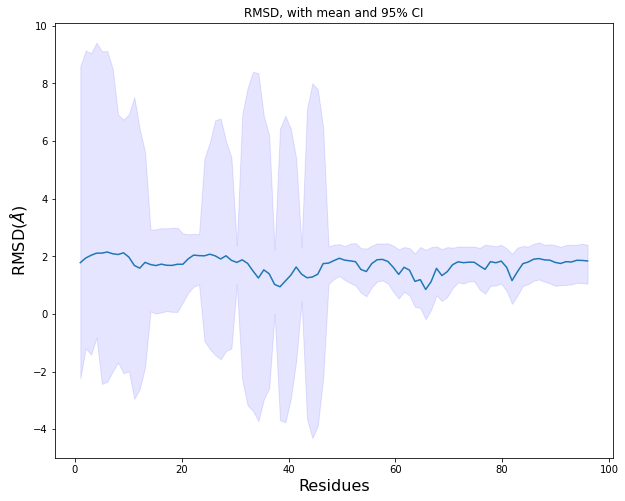

In [77]:
from matplotlib import pyplot as plt
fig=plt.figure(figsize=(10,8)),
x=np.linspace(1,num_residue+1,num_residue)
plt.plot(x,median_RMSD_along_all_conf)
plt.fill_between(x,(mean_RMSD_along_all_conf-ci), (mean_RMSD_along_all_conf+ci), color='b', alpha=.1)
plt.xlabel("Residues",fontsize=16)
plt.ylabel("RMSD($\\AA$)",fontsize=16)
plt.title("RMSD, with mean and 95% CI")
plt.savefig("RMSD_with_mean_95CI.png")
#ax.set_xticks(list(x))

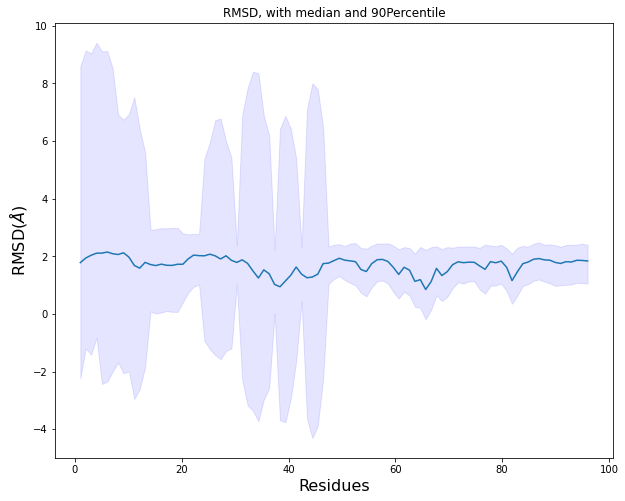

In [76]:
from matplotlib import pyplot as plt
fig=plt.figure(figsize=(10,8)),
x=np.linspace(1,num_residue+1,num_residue)
plt.plot(x,median_RMSD_along_all_conf)
plt.fill_between(x,(mean_RMSD_along_all_conf-ci), (mean_RMSD_along_all_conf+ci), color='b', alpha=.1)
plt.xlabel("Residues",fontsize=16)
plt.ylabel("RMSD($\\AA$)",fontsize=16)
plt.title("RMSD, with median and 90Percentile")
plt.savefig("RMSD_with_median_90_percentile.png")

In [41]:
# Calculate average RMSD per position
structure_rmsd_fragments = np.array(structure_rmsd_fragments)  # no_models X no_fragments X fragment_size
# Calculate the RMSD average for each fragments along all models
structure_rmsd_fragments = np.average(structure_rmsd_fragments, axis=0)  # no_fragments X fragment_size

In [55]:
# Pad with right zeros to reach the sequence length (no_fragments + fragment_size)
structure_rmsd_fragments = np.pad(structure_rmsd_fragments, ((0, 0), (0, structure_rmsd_fragments.shape[0])))
print(structure_rmsd_fragments.shape)

(95, 100)


In [56]:
# Roll the fragments one by one (add heading zeros)
for i, row in enumerate(structure_rmsd_fragments):
    structure_rmsd_fragments[i] = np.roll(row, i)
print(structure_rmsd_fragments)

[[1.85823796 1.97971182 2.3327567  ... 0.         0.         0.        ]
 [0.         2.53141234 3.49803438 ... 0.         0.         0.        ]
 [0.         0.         2.75601637 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 1.60147405 0.         0.        ]
 [0.         0.         0.         ... 1.77217244 1.87157774 0.        ]]


In [88]:
structure_rmsd_fragments[94]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [57]:
# Calculate average along columns of overlapping fragments (average RMSD per residue)
structure_rmsd_median = np.median(structure_rmsd_fragments, axis=0)

In [59]:
#structure_rmsd_fragments_masked=np.ma.masked_where(structure_rmsd_fragments == 0, structure_rmsd_fragments)
structure_rmsd_masked_median = np.median(structure_rmsd_fragments_masked, axis=0)

In [58]:
structure_rmsd_median

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [60]:
#structure_rmsd_masked_median

masked_array(data=[--, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, 0.0, 0.0, 0.0, 0.0, 0.0, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --],
             mask=[ True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,

### 3. Graph extraction
Nodes are a subset of representative conformations and edges represent their similarity (or distance). The similarity is calculated combining all feature values. Representative conformations are found by unsupervised
clustering and the number of clusters is identified automatically.

### 4. Pymol image
An Pymol image including the PDB structures corresponding to the graph nodes.
Centered (translate) the selected structures on the position(s) with the lowest feature
variance. Residues in each structure will be displayed (color, size, ...) based on their
feature variability within the ensemble.